# Unsupervised Learning: Trade&Ahead

## Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


## Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler , MinMaxScaler


# to compute distances between data points
from scipy.spatial.distance import cdist

# to compute distances
from scipy.spatial.distance import pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, to compute cophenet and draw dendrogram
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage


<IPython.core.display.Javascript object>

In [2]:
# loading the dataset
data = pd.read_csv("stock_data.csv")
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns in the data set.")

There are 340 rows and 15 columns in the data set.


<IPython.core.display.Javascript object>

In [3]:
# viewing a random sample of the dataset
data.sample(5)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
159,HRL,Hormel Foods Corp.,Consumer Staples,Packaged Foods & Meats,39.540001,24.496225,1.078455,17,29,13065000,686088000,3.28,1.992378e+08,24.070121,-1.980483
188,LLY,Lilly (Eli) & Co.,Health Care,Pharmaceuticals,84.260002,0.789478,1.440622,17,54,-205200000,2408400000,2.27,1.060969e+09,37.118944,-0.651103
249,PGR,Progressive Corp.,Financials,Property & Casualty Insurance,31.799999,3.515625,1.086898,17,99,116000000,1267600000,2.16,5.868519e+08,14.722222,-0.843313
254,PNW,Pinnacle West Capital,Utilities,MultiUtilities,64.480003,0.498752,1.143421,10,3,31884000,437257000,3.94,1.109789e+08,16.365483,-6.089228
244,PEG,Public Serv. Enterprise Inc.,Utilities,Electric Utilities,38.689999,-8.230553,1.180661,13,11,-8000000,1679000000,3.32,5.057229e+08,11.653614,-0.361858


<IPython.core.display.Javascript object>

In [4]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

<IPython.core.display.Javascript object>

In [5]:
# fixing column names
df.columns = [c.replace(" ", "_") for c in df.columns]

<IPython.core.display.Javascript object>

## Data Overview

In [6]:
# let's look at the structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker_Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS_Sector                   340 non-null    object 
 3   GICS_Sub_Industry             340 non-null    object 
 4   Current_Price                 340 non-null    float64
 5   Price_Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash_Ratio                    340 non-null    int64  
 9   Net_Cash_Flow                 340 non-null    int64  
 10  Net_Income                    340 non-null    int64  
 11  Earnings_Per_Share            340 non-null    float64
 12  Estimated_Shares_Outstanding  340 non-null    float64
 13  P/E_R

<IPython.core.display.Javascript object>

* There are 7 float, 4 integrer and 4 object data types in the data set. 

In [7]:
cols = ["Ticker_Symbol", "Security", "GICS_Sector", "GICS_Sub_Industry"]
df[cols] = df[cols].astype("category")

<IPython.core.display.Javascript object>

In [8]:
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

* There is no duplicate observation in the data.

In [9]:
df.describe()

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio
count,340.000000,340.000000,340.000000,340.000000,340.000000,3.400000e+02,3.400000e+02,340.000000,3.400000e+02,340.000000,340.000000
mean,80.862345,4.078194,1.525976,39.597059,70.023529,5.553762e+07,1.494385e+09,2.776662,5.770283e+08,32.612563,-1.718249
std,98.055086,12.006338,0.591798,96.547538,90.421331,1.946365e+09,3.940150e+09,6.587779,8.458496e+08,44.348731,13.966912
min,4.500000,-47.129693,0.733163,1.000000,0.000000,-1.120800e+10,-2.352800e+10,-61.200000,2.767216e+07,2.935451,-76.119077
25%,38.555000,-0.939484,1.134878,9.750000,18.000000,-1.939065e+08,3.523012e+08,1.557500,1.588482e+08,15.044653,-4.352056
50%,59.705000,4.819505,1.385593,15.000000,47.000000,2.098000e+06,7.073360e+08,2.895000,3.096751e+08,20.819876,-1.067170
75%,92.880001,10.695493,1.695549,27.000000,99.000000,1.698108e+08,1.899000e+09,4.620000,5.731175e+08,31.764755,3.917066
max,1274.949951,55.051683,4.580042,917.000000,958.000000,2.076400e+10,2.444200e+10,50.090000,6.159292e+09,528.039074,129.064585


<IPython.core.display.Javascript object>

* The average Current_Price is 81.
* The average Price_Change is 4.
* The average Volatility is 1.5.
* The average ROE is 39.6.
* The average Cash_Ratio is 70.
* The average Net_Cash_Flow is 5.553762e+07.
* The average Net_Income is 1.494385e+09.
* The average Earnings_Per_Share is 2.776662.
* The average Estimated_Shares_Outstanding is 5.770283e+08.
* The average P/E_Ratio is 32.612563.
* The average P/B_Ratio is -1.718249.

* The numerical variables have different ranges and have to be scaled before clustering.



In [10]:
# checking missing values
df.isna().sum()

Ticker_Symbol                   0
Security                        0
GICS_Sector                     0
GICS_Sub_Industry               0
Current_Price                   0
Price_Change                    0
Volatility                      0
ROE                             0
Cash_Ratio                      0
Net_Cash_Flow                   0
Net_Income                      0
Earnings_Per_Share              0
Estimated_Shares_Outstanding    0
P/E_Ratio                       0
P/B_Ratio                       0
dtype: int64

<IPython.core.display.Javascript object>

* There are no null values in the data.

In [11]:
# Let's see unique values
num_col = df.select_dtypes(include=np.number).columns.tolist()

for col in num_col:
    print(
        "Unique values in the column '{}' are \n\n".format(col), df[col].unique(),
    )
    print("-" * 100)

Unique values in the column 'Current_Price' are 

 [  42.349998     59.240002     44.91         93.940002     55.32
   36.68        276.570007     43.23         58.27         59.900002
   61.970001     40.029999     80.540001     40.939999     52.630001
   56.009998     80.510002     62.09         65.919998    190.75
   18.67         53.59        159.759995    162.330002    106.419998
   96.949997    675.890015     59.66        139.440002     92.209999
   44.470001     48.580002     52.23          7.3988066    38.709999
  184.130005    145.149994     59.75         69.550003    144.589996
   16.83         38.150002     37.810001    189.440002     46.150002
  306.350006     41.220001     72.730003     68.790001     18.440001
  127.540001     51.75         67.959999    116.849998     34.580002
   86.449997     54.48        119.760002     40.810001     26.190001
   42.4399985     4.5          62.02        183.100006    146.330002
   59.169998     66.620003     41.830002     90.599998    47

<IPython.core.display.Javascript object>

In [12]:
def checkNumeric(list):
    nonNumeric = []
    for i, value in enumerate(list):
        try:
            list[i] = float(value)
        except ValueError:
            nonNumeric.append(list[i])
    print(np.unique(nonNumeric))


for col in num_col:
    print("Non numeric values in the column '{}' are".format(col))
    checkNumeric(df[col].values)
    print("-" * 100)

Non numeric values in the column 'Current_Price' are
[]
----------------------------------------------------------------------------------------------------
Non numeric values in the column 'Price_Change' are
[]
----------------------------------------------------------------------------------------------------
Non numeric values in the column 'Volatility' are
[]
----------------------------------------------------------------------------------------------------
Non numeric values in the column 'ROE' are
[]
----------------------------------------------------------------------------------------------------
Non numeric values in the column 'Cash_Ratio' are
[]
----------------------------------------------------------------------------------------------------
Non numeric values in the column 'Net_Cash_Flow' are
[]
----------------------------------------------------------------------------------------------------
Non numeric values in the column 'Net_Income' are
[]
----------------------

<IPython.core.display.Javascript object>

* There are no missing values in the numeric data.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.

### Univariate Analysis

In [13]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

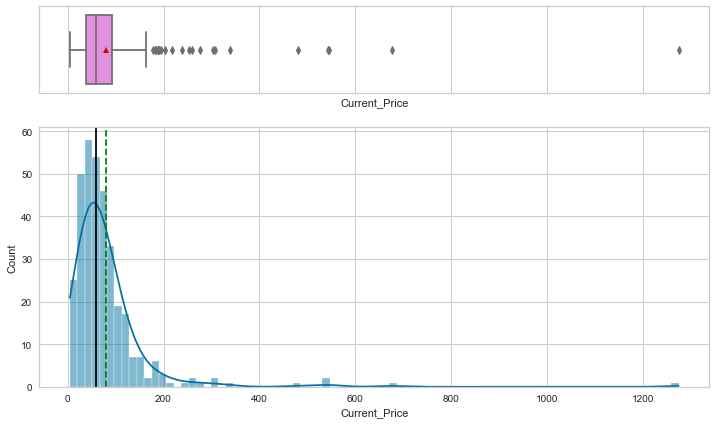

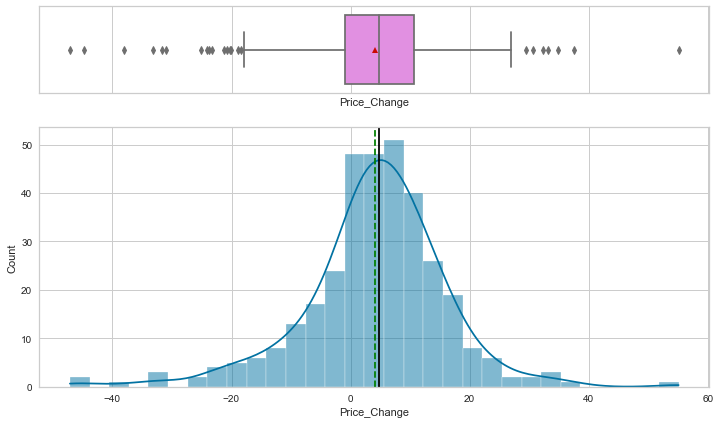

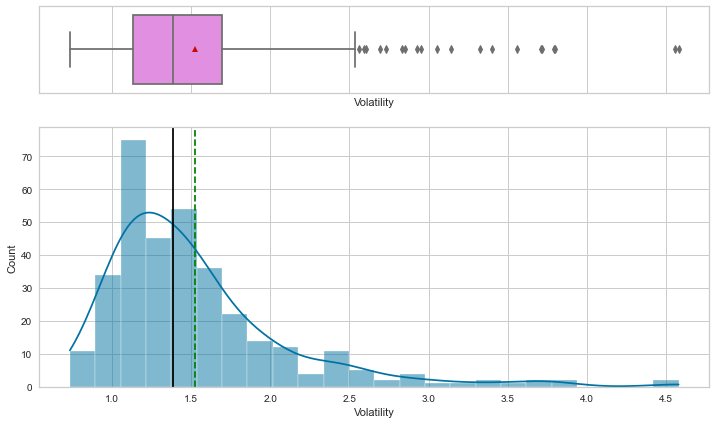

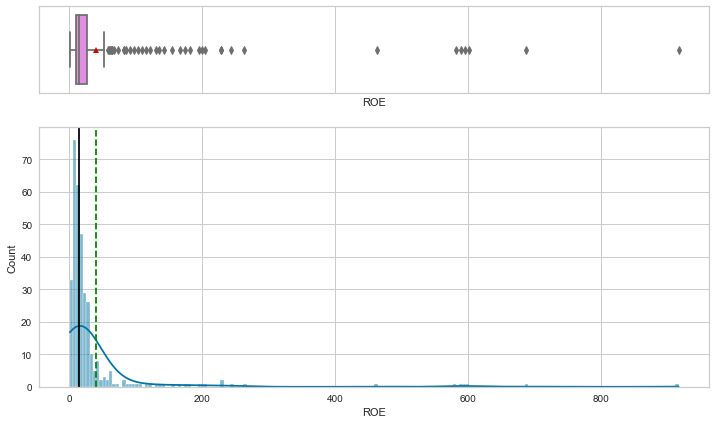

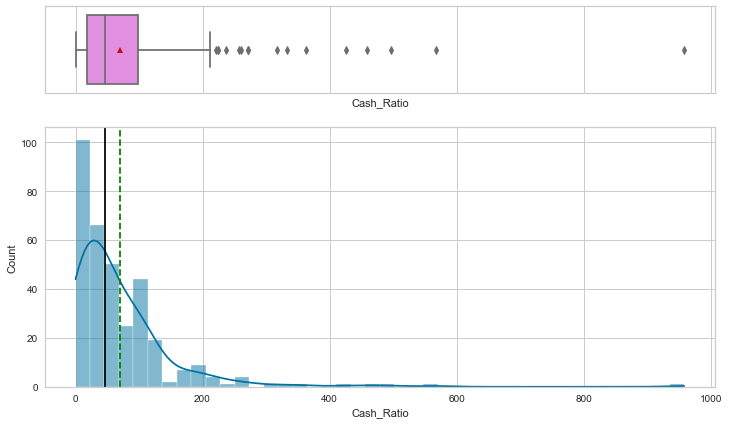

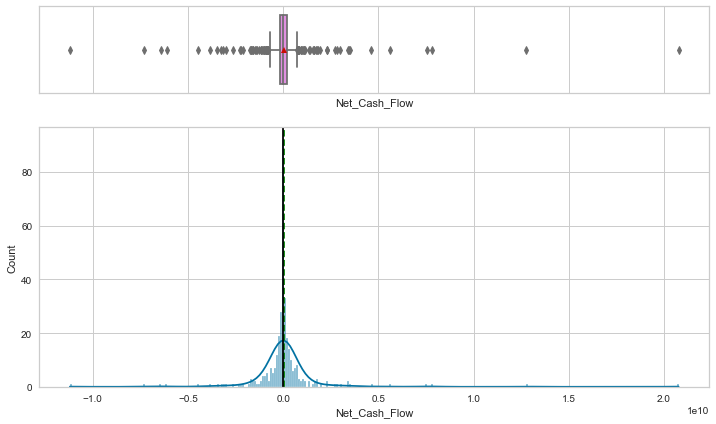

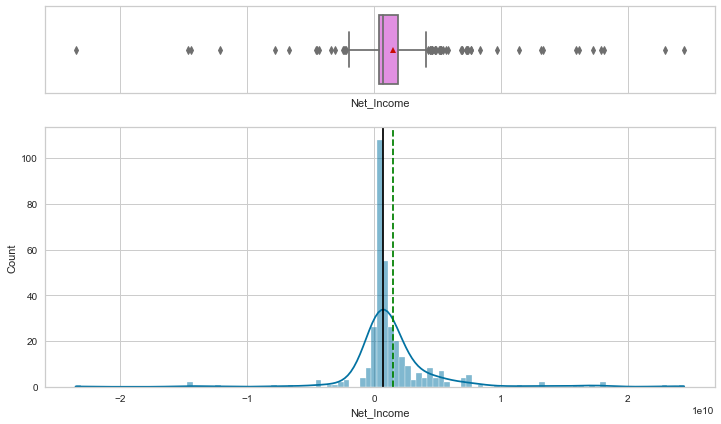

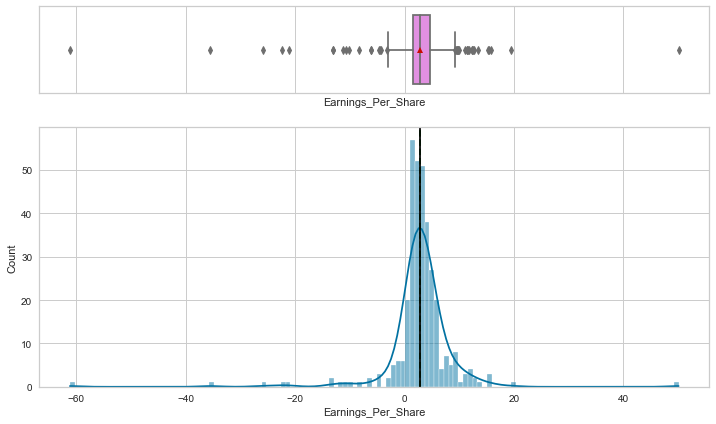

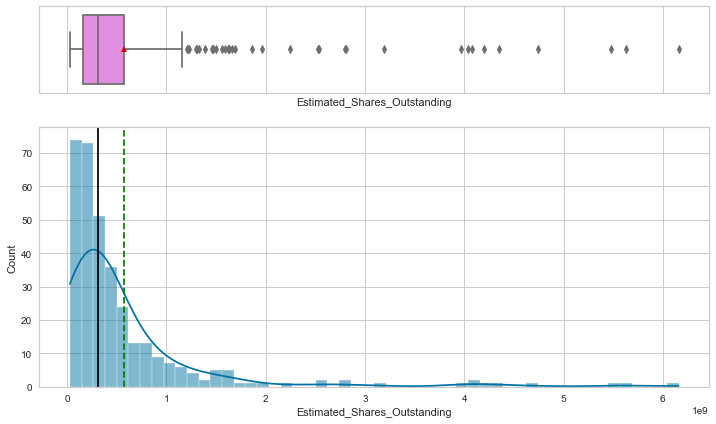

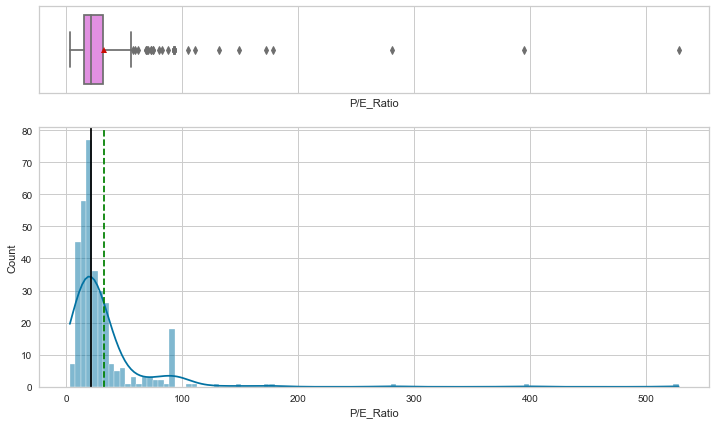

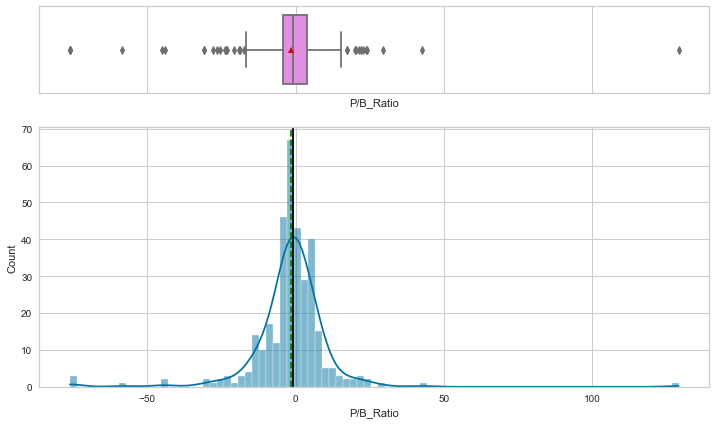

<IPython.core.display.Javascript object>

In [14]:
# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for item in num_col:
    histogram_boxplot(df, item, kde=True)

* The current_price is right_skewed distributions with upper outliers, which indicates the presence of some expensive stock price.
* The price_change parameter is normally distributed with mean value of near zero which shows that some stocks have positive price change in last 13 weeks and some negative. 
* The volatility and Estimated_Shares_Outstanding have right-skewed distribution.
* The ROE, cash ratio and P/E_Ratio parameters are extrememly right-skewed with upper outliers.
* The Net_Cash_Flow, Net_Income, Earning_Per_Share and P/B_Ratio parameters are mostly normaly distributed.

In [15]:
num_col = df.select_dtypes(include=np.number).columns.tolist()

<IPython.core.display.Javascript object>

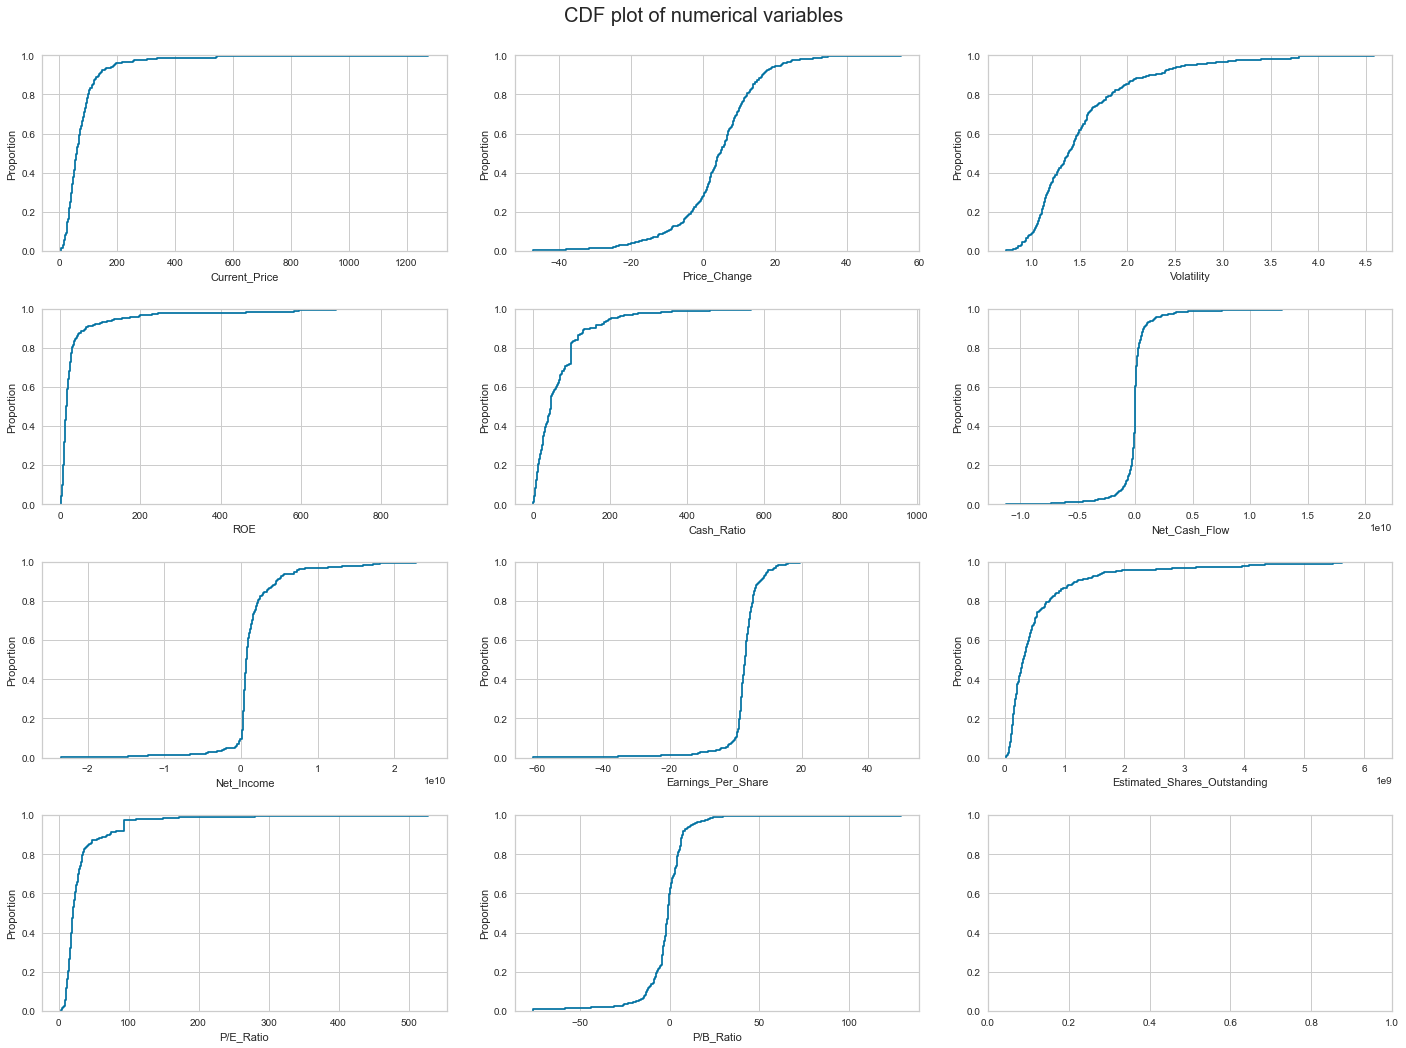

<IPython.core.display.Javascript object>

In [16]:
fig, axes = plt.subplots(4, 3, figsize=(20, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)
counter = 0
for ii in range(4):
    sns.ecdfplot(ax=axes[ii][0], x=df[num_col[counter]])
    counter = counter + 1
    if counter != 11:
        sns.ecdfplot(ax=axes[ii][1], x=df[num_col[counter]])
        counter = counter + 1
        if counter != 11:
            sns.ecdfplot(ax=axes[ii][2], x=df[num_col[counter]])
            counter = counter + 1
    else:
        pass
fig.tight_layout(pad=2.0)

* Above graphs show the cumulative density function of the features.
* For instance, 95% of the current_price feature is less than 200. 

In [17]:
# function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=12)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(ascending=False),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

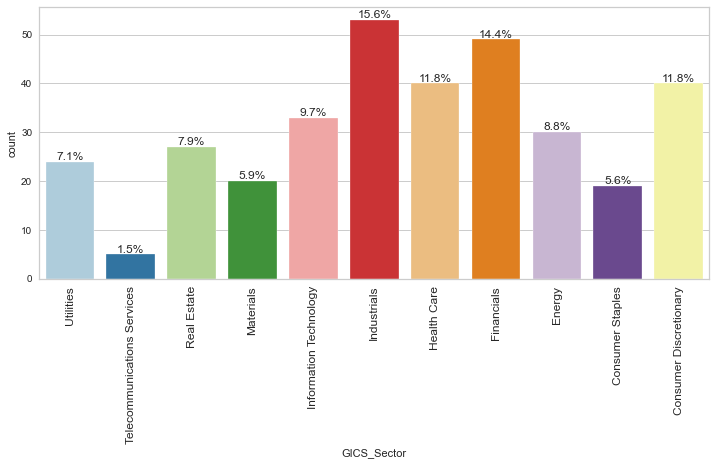

<IPython.core.display.Javascript object>

In [18]:
labeled_barplot(df, "GICS_Sector", perc=True)

* Based on GICS classificationm most of the business sectors of the companies are classified as Industrials (15.6%) followed by Financials (14.4%), Customer Discretionary, and Health Care (both 11.8%). 
* Totally, more than 50% of companies are classified in four above mentioned categories out of 11 categories sorted here.
* The least business sector is classified as Telecommunication Services with 1.5% of the total amount.

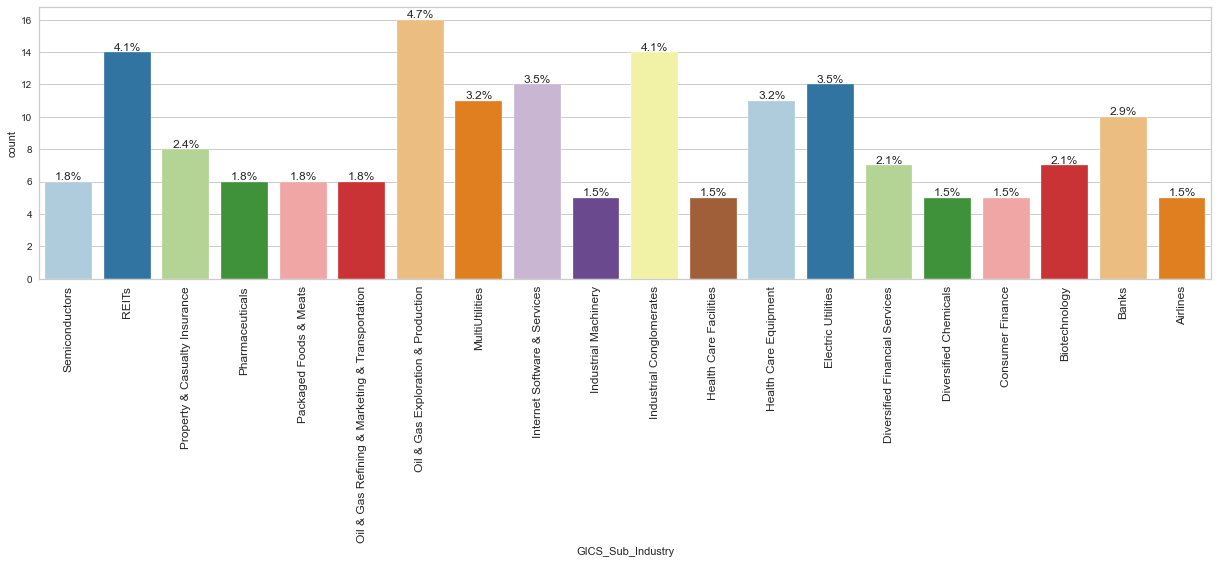

<IPython.core.display.Javascript object>

In [19]:
labeled_barplot(df, "GICS_Sub_Industry", perc=True, n=20)

* Based on the GICS Sub Industry classification, Oil and Gas Exploration and Production with 4.7% followed by Industrial conglomerates and REITs with 4.1% are the most frequent sub-industry classifications.  

### Bivariate Analysis

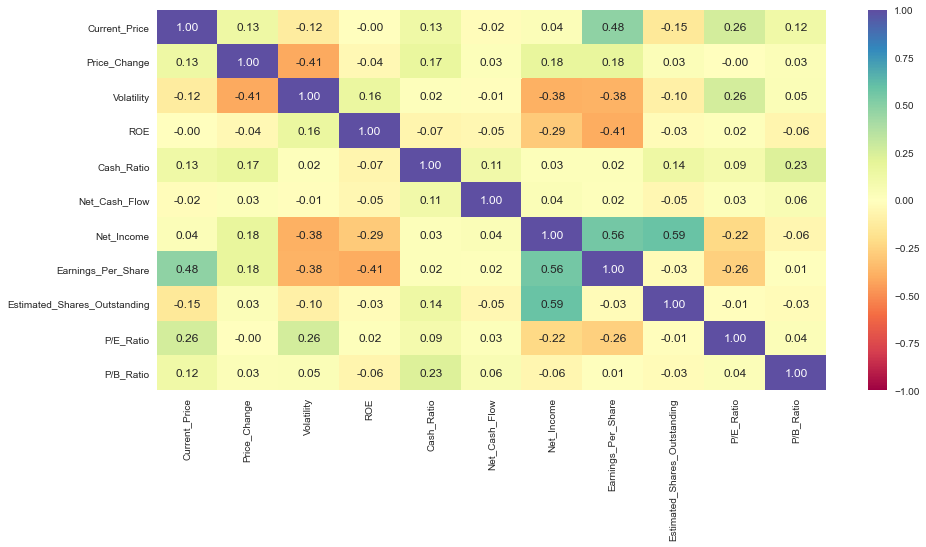

<IPython.core.display.Javascript object>

In [20]:
# correlation check
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* Some variables are correlated positively to each other such as Estimated_Shares_Outstanding and Net_Income with a 59% correlation.
* Some variables are correlated negatively to each other such as Volatility and Price_Change with a -41% correlation.

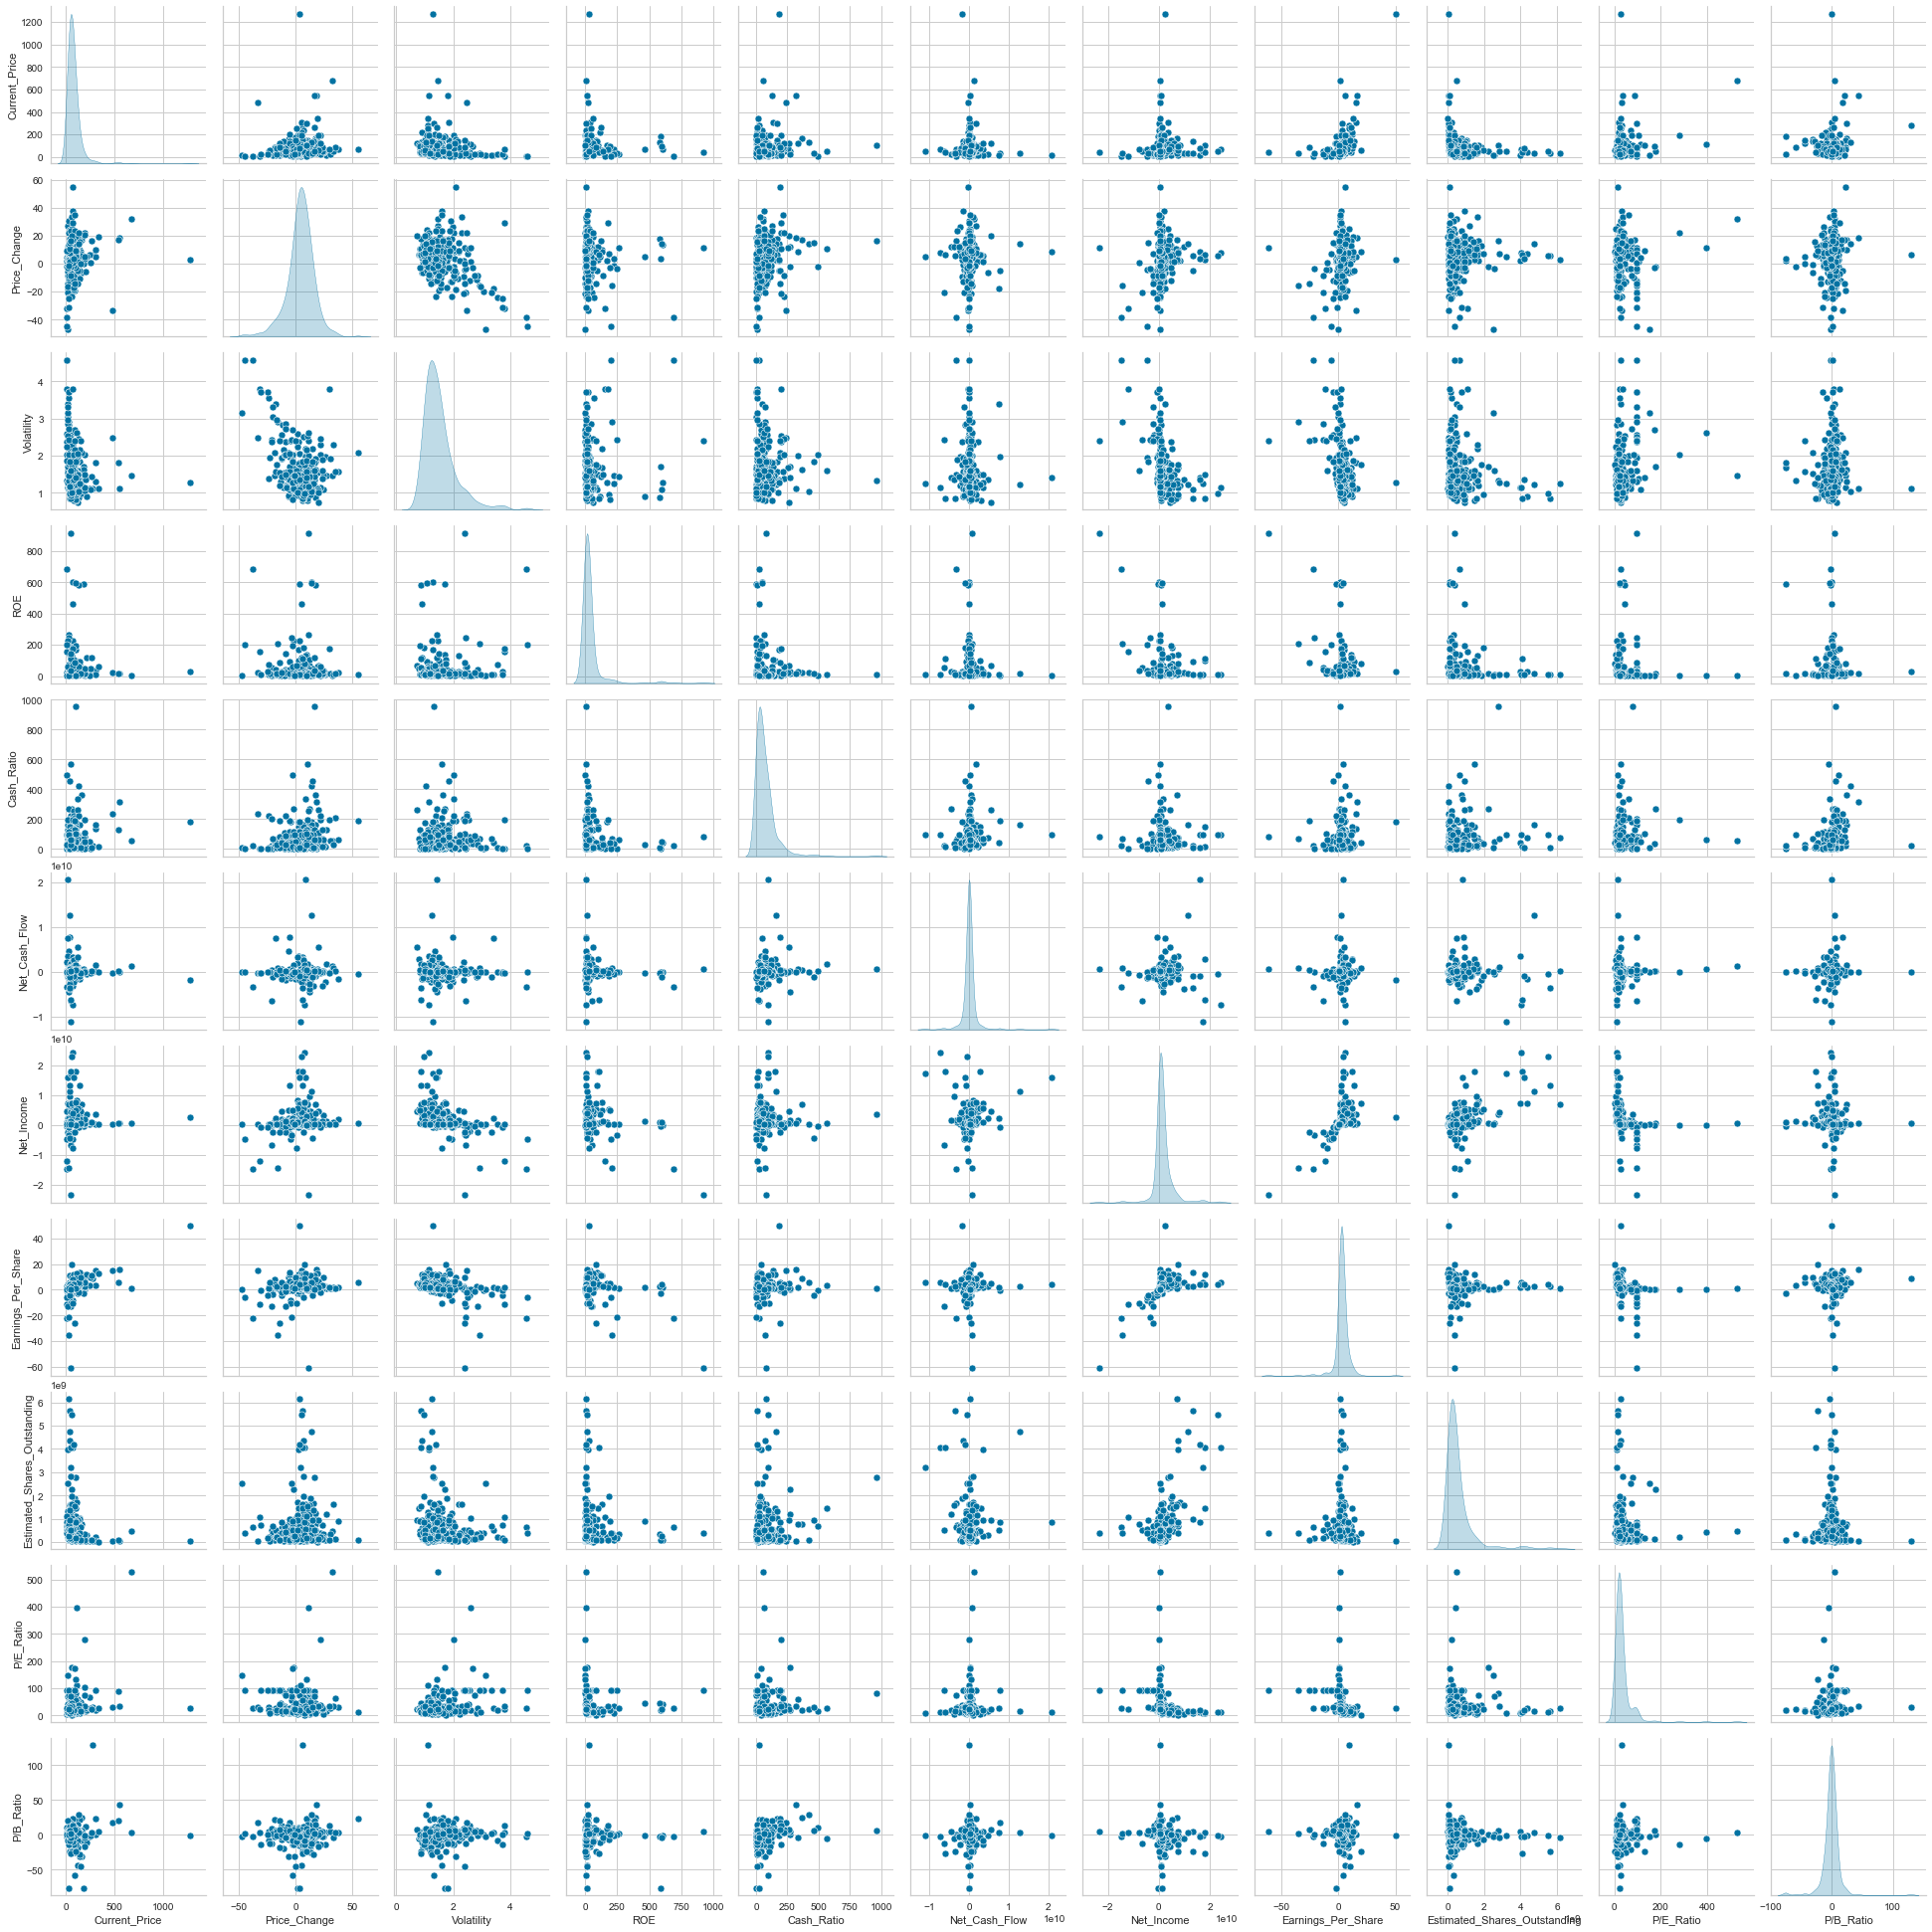

<IPython.core.display.Javascript object>

In [21]:
num_col = df.select_dtypes(include=np.number).columns.tolist()
sns.pairplot(data=df[num_col], diag_kind="kde")
plt.show()

#### The maximum stock price increase on average across economic sector

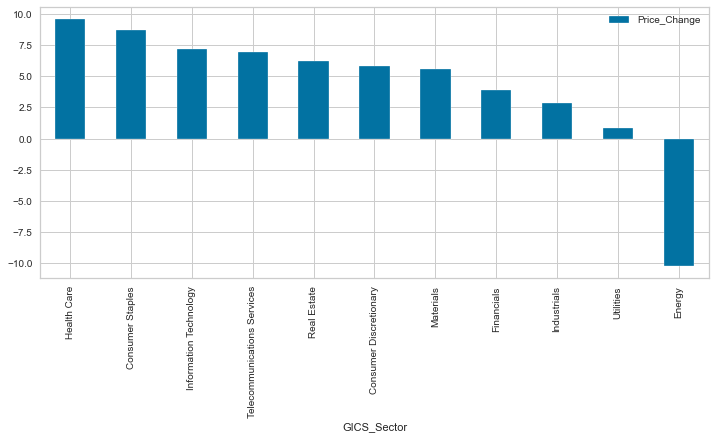

<IPython.core.display.Javascript object>

In [22]:
figsize = (12, 5)
df.groupby(by=["GICS_Sector"])["Price_Change"].mean().reset_index().sort_values(
    ["Price_Change"], ascending=False
).plot(x="GICS_Sector", y="Price_Change", kind="bar", figsize=figsize)
plt.show()

* The "Health Care" has the maximum stock price increase on average followed by "Consumer Staples" and "Information Technology" companies.
* The "Energy" sector has decrease in stock price on average for last 13 weeks.

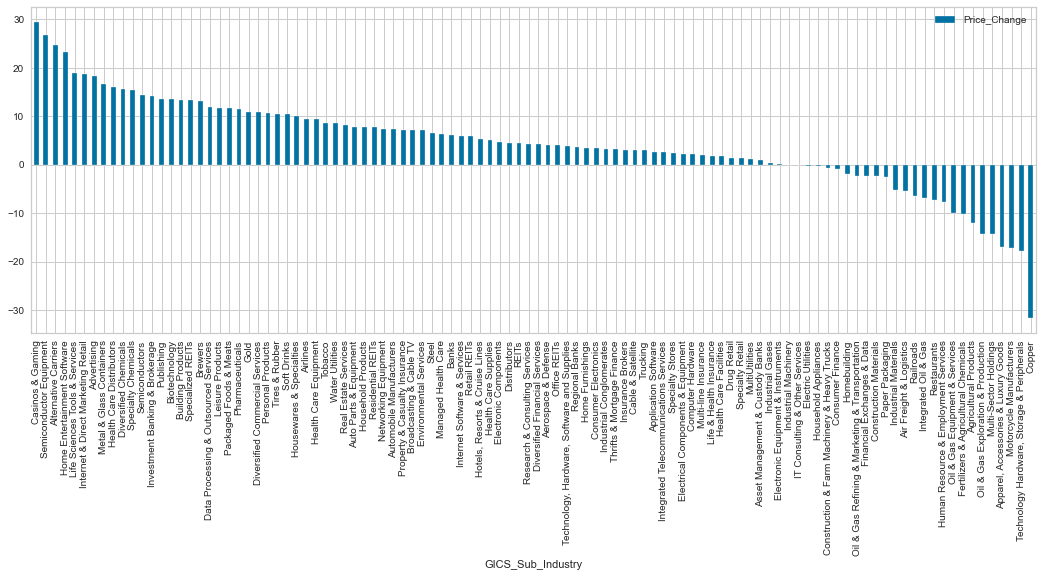

<IPython.core.display.Javascript object>

In [23]:
figsize = (18, 6)
df.groupby(by=["GICS_Sub_Industry"])["Price_Change"].mean().reset_index().sort_values(
    ["Price_Change"], ascending=False
).plot(x="GICS_Sub_Industry", y="Price_Change", kind="bar", figsize=figsize)
plt.show()

* The copper has the worst decrease in stock price on average for last 13 weeks based on sub industry GICS classification.

#### The average cash ratio varies across economic sectors

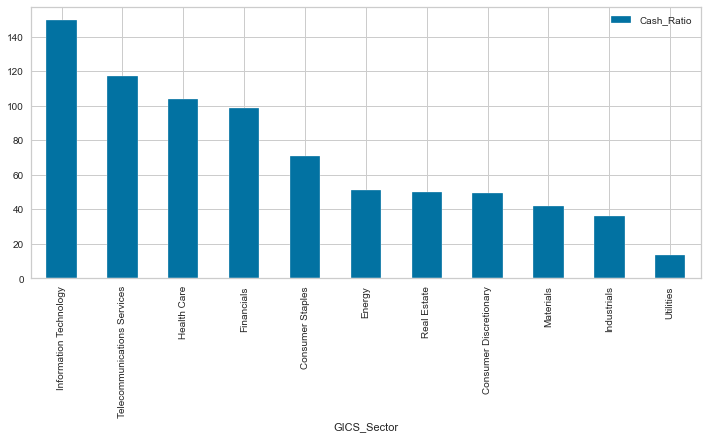

<IPython.core.display.Javascript object>

In [24]:
figsize = (12, 5)
df.groupby(by=["GICS_Sector"])["Cash_Ratio"].mean().reset_index().sort_values(
    ["Cash_Ratio"], ascending=False
).plot(x="GICS_Sector", y="Cash_Ratio", kind="bar", figsize=figsize)
plt.show()

* In average, the highest Cash_Ratio is related to Information Technology sector followed by Telecomunications Services and Health Care. 
* In average, the lowest Cash_Ratio is related to Utilities.

#### The average P/E ratio varies across economic sectors

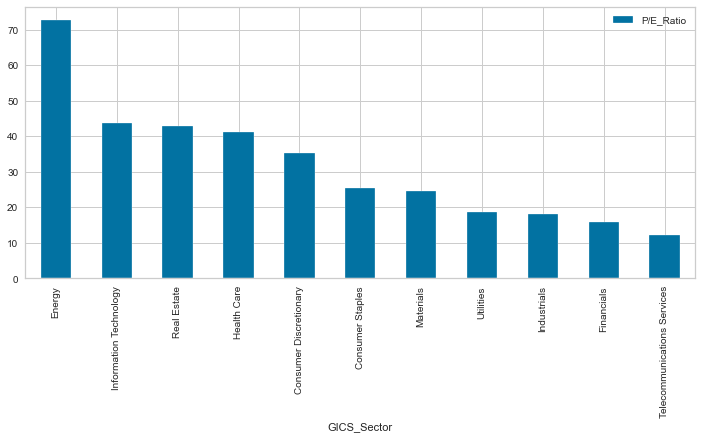

<IPython.core.display.Javascript object>

In [25]:
figsize = (12, 5)
df.groupby(by=["GICS_Sector"])["P/E_Ratio"].mean().reset_index().sort_values(
    ["P/E_Ratio"], ascending=False
).plot(x="GICS_Sector", y="P/E_Ratio", kind="bar", figsize=figsize)
plt.show()

* In average, the highest P/E_Ratio is related to Energy sector followed by Information Technology and Real Estate sector. 
* In average, the lowest P/E_Ratio is related to Telecomunication Services. 

#### The average Volatility varies across economic sectors

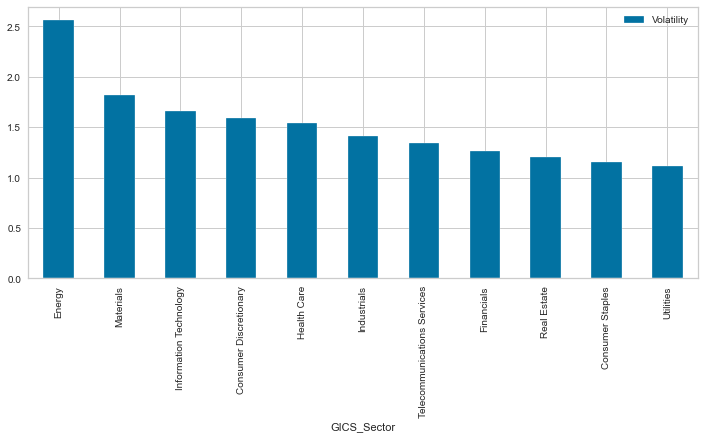

<IPython.core.display.Javascript object>

In [26]:
figsize = (12, 5)
df.groupby(by=["GICS_Sector"])["Volatility"].mean().reset_index().sort_values(
    ["Volatility"], ascending=False
).plot(x="GICS_Sector", y="Volatility", kind="bar", figsize=figsize)
plt.show()

* In average, the highest Volatility is related to Energy sector followed by Materials and Information Technology sector. 
* In average, the lowest Volatility is related to Utilities. 

## Data Preprocessing

### Duplicate value check and Missing value treatment

* As discussed above, there is no duplicate and missing values in the dataset.

### Outlier value check

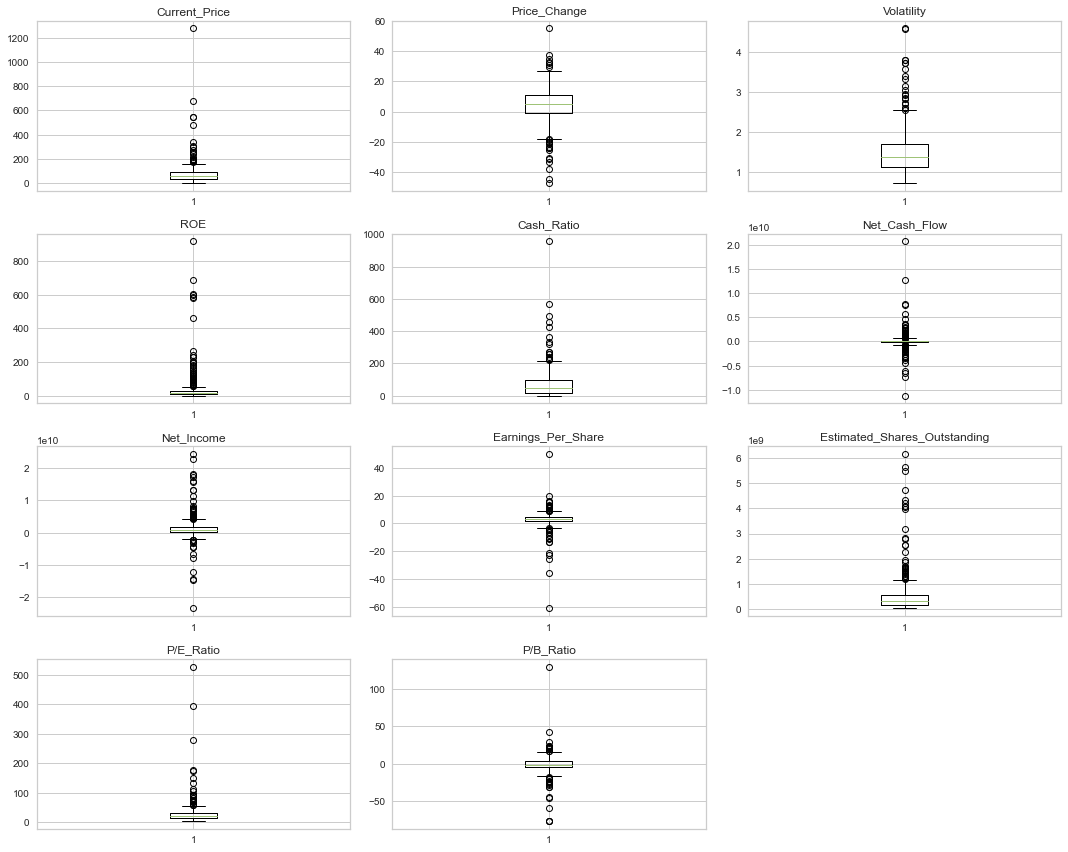

<IPython.core.display.Javascript object>

In [27]:
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 3, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* It seems that there are some outliers in the data as discussed in EDA but scince it may be possible to have these values; we are not going to treat these values. 

### Feature engineering

In [28]:
num_col = df.select_dtypes(include=np.number).columns.tolist()

# scaling the dataset before clustering
scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

# creating a dataframe of the scaled columns
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

<IPython.core.display.Javascript object>

In [29]:
subset_scaled_df.head()

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196


<IPython.core.display.Javascript object>

* Because of scaling, we have negative and postive values for the scaled features. It can become difficult to get sense of that, for instance, what a Current_Price value of -0.3933 means.

## EDA

- It is a good idea to explore the data once again after manipulating it.

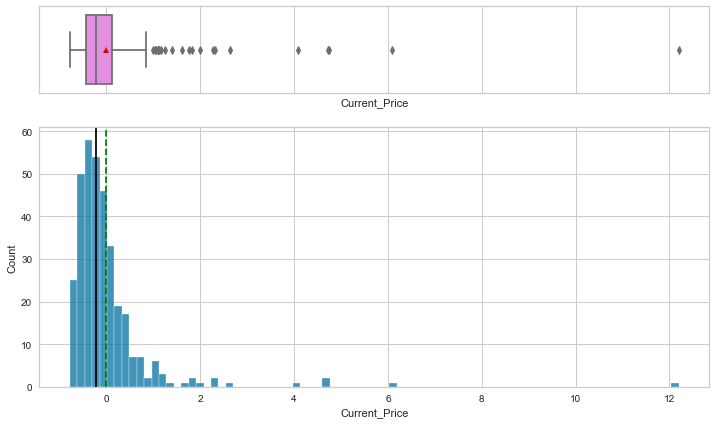

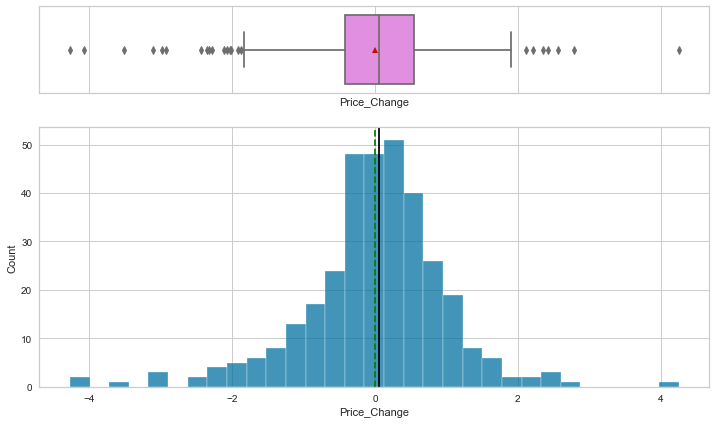

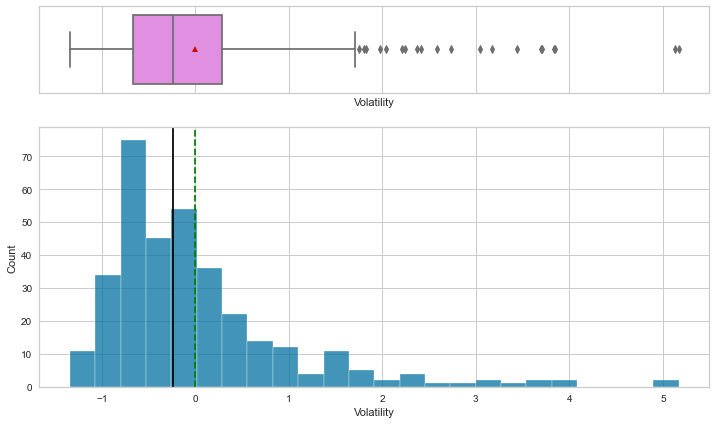

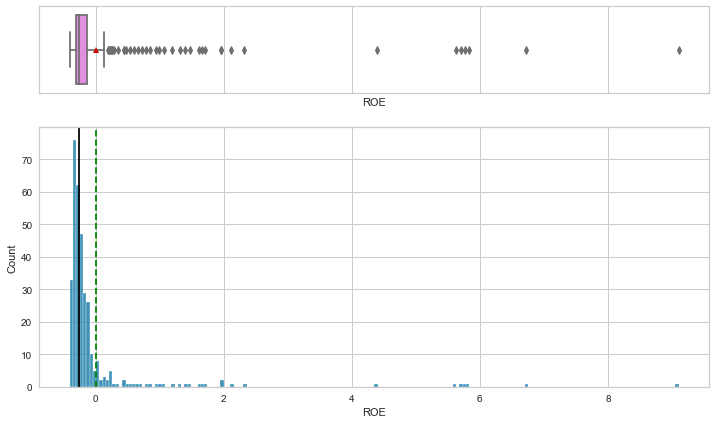

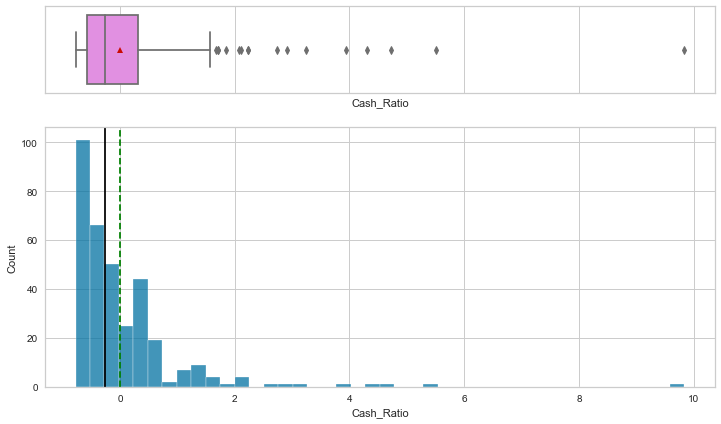

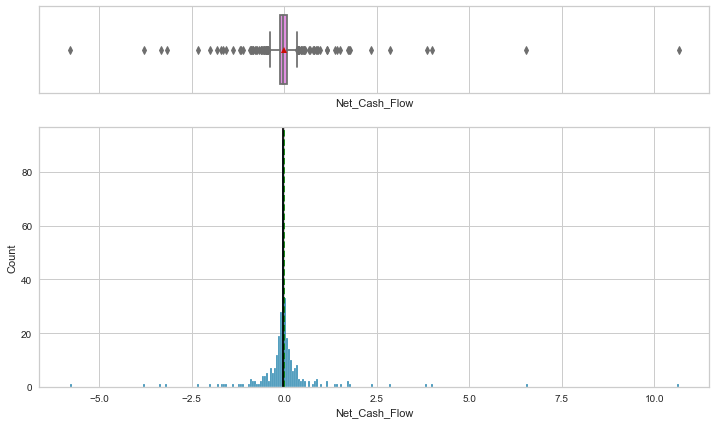

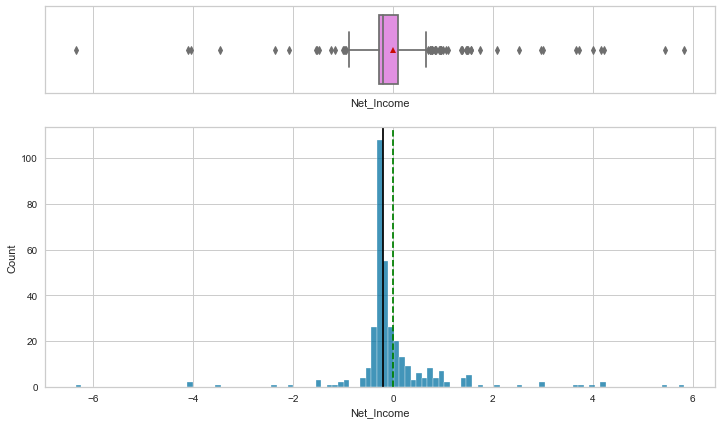

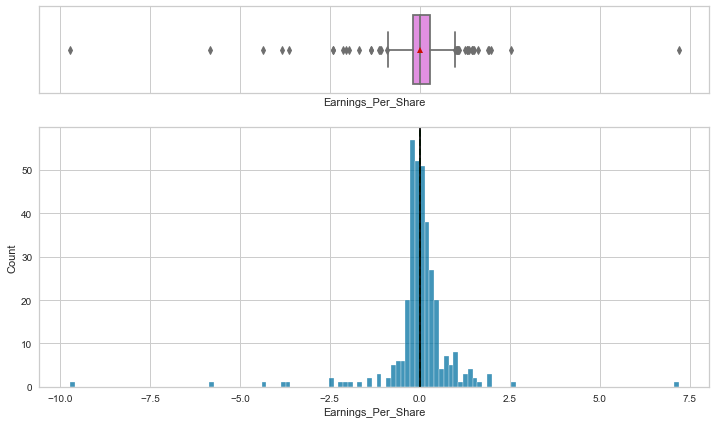

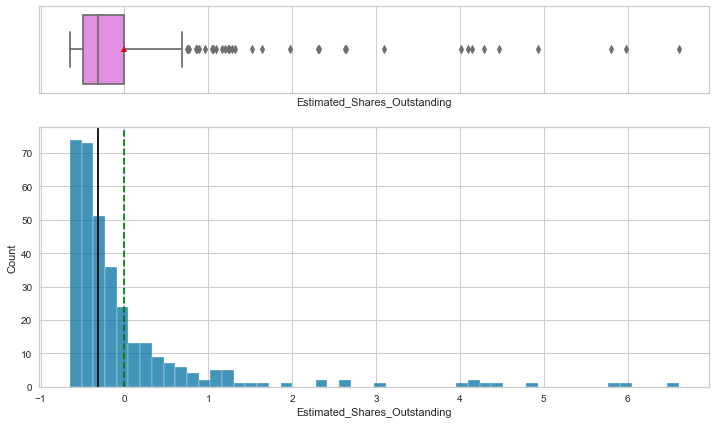

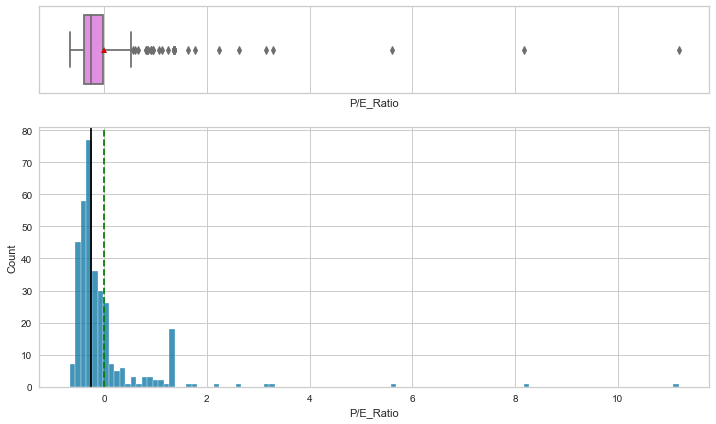

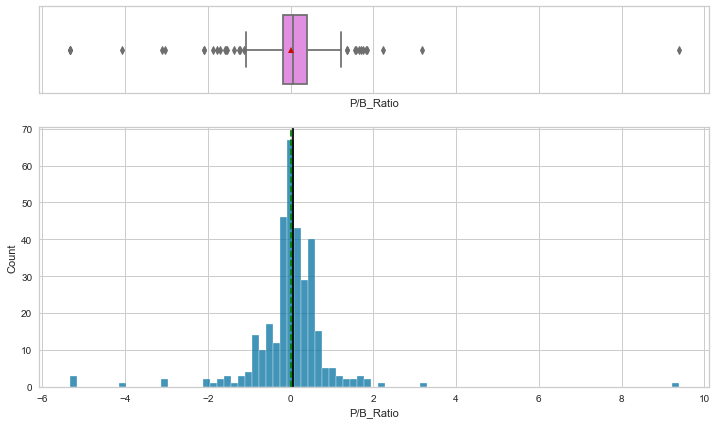

<IPython.core.display.Javascript object>

In [30]:
# selecting numerical columns
num_col = subset_scaled_df.select_dtypes(include=np.number).columns.tolist()

for item in num_col:
    histogram_boxplot(subset_scaled_df, item)

* As it is clear, the distribution of the data did not change after scaling the data.

## K-means Clustering

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.1745559827866363
Number of Clusters: 5 	Average Distortion: 2.144480108281479
Number of Clusters: 6 	Average Distortion: 2.0574742484876594
Number of Clusters: 7 	Average Distortion: 2.035145223472287
Number of Clusters: 8 	Average Distortion: 1.9788795233272316
Number of Clusters: 9 	Average Distortion: 1.9247285037268589
Number of Clusters: 10 	Average Distortion: 1.8565819105751697
Number of Clusters: 11 	Average Distortion: 1.7964088426315568
Number of Clusters: 12 	Average Distortion: 1.7545236615257802
Number of Clusters: 13 	Average Distortion: 1.7417609203336912
Number of Clusters: 14 	Average Distortion: 1.673559857259703
Number of Clusters: 15 	Average Distortion: 1.6321519357319259
Number of Clusters: 16 	Average Distortion: 1.6244100744894467
Numbe

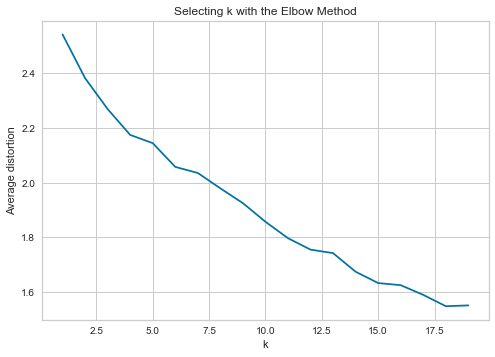

<IPython.core.display.Javascript object>

In [31]:
df_k_means = subset_scaled_df.copy()  # make a copy from the scaled data

clusters = range(1, 20)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, init="k-means++", n_init=30, random_state=1)
    model.fit(df_k_means)
    prediction = model.predict(df_k_means)
    distortion = (
        sum(np.min(cdist(df_k_means, model.cluster_centers_, "euclidean"), axis=1))
        / df_k_means.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average distortion")
plt.title("Selecting k with the Elbow Method")
plt.show()

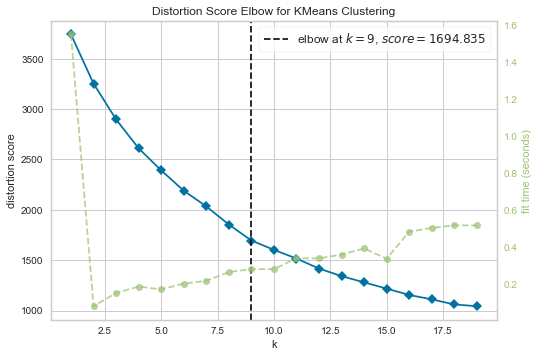

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

<IPython.core.display.Javascript object>

In [32]:
model = KMeans(n_clusters=k, init="k-means++", n_init=30, random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 20), timings=True)
visualizer.fit(df_k_means)  # fit the data to the visualizer
visualizer.show()  # finalize and render figur

**The appropriate value of k from the elbow curve seems to be 3 or 4 or 5 or 6**

**Let's check the silhouette scores.**

For n_clusters = 2, the silhouette score is 0.43969639509980457)
For n_clusters = 3, the silhouette score is 0.4644405674779403)
For n_clusters = 4, the silhouette score is 0.4577225970476733)
For n_clusters = 5, the silhouette score is 0.43228336443659804)
For n_clusters = 6, the silhouette score is 0.40054227372136175)
For n_clusters = 7, the silhouette score is 0.3976335364987305)
For n_clusters = 8, the silhouette score is 0.40278401969450467)
For n_clusters = 9, the silhouette score is 0.3778585981433699)
For n_clusters = 10, the silhouette score is 0.13458938329968687)
For n_clusters = 11, the silhouette score is 0.1421832155528444)
For n_clusters = 12, the silhouette score is 0.2044669621527429)
For n_clusters = 13, the silhouette score is 0.23424874810104204)
For n_clusters = 14, the silhouette score is 0.12102526472829901)
For n_clusters = 15, the silhouette score is 0.15857943020213497)
For n_clusters = 16, the silhouette score is 0.13760795993463953)
For n_clusters = 17, the

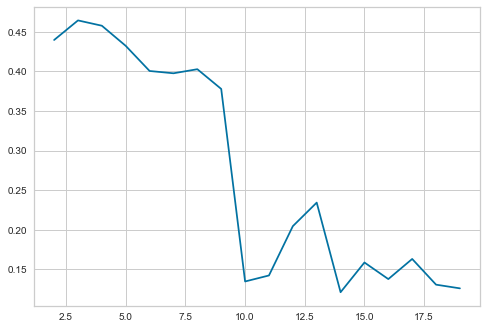

<IPython.core.display.Javascript object>

In [33]:
sil_score = []
cluster_list = list(range(2, 20))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((df_k_means))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(df_k_means, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

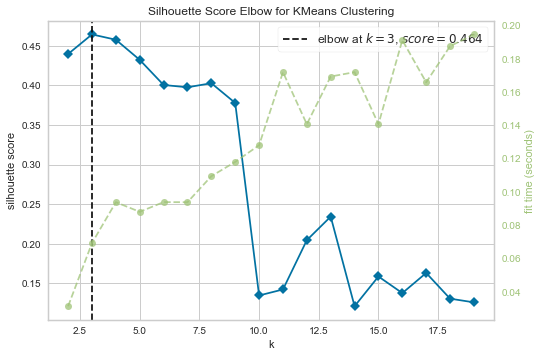

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

<IPython.core.display.Javascript object>

In [34]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 20), metric="silhouette", timings=True)
visualizer.fit(df_k_means)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

**From the silhouette scores, it seems that 3 or 4 or 6 or 7 is a good value of k.**

In the following, we will use a silhouhette visualization to choose the appropriate number of clusters. This displays the silhouette coefficient for each sample on a per-cluster basis, visualizing which clusters are dense and which are not.

What to look for in a silhouette visualization for selecting the number of clusters:
- All clusters have silhouhette coefficients above the silhuette score
- Small fluctuation in the maximum silhouette score
- Even size of the clusters (not always a clue)

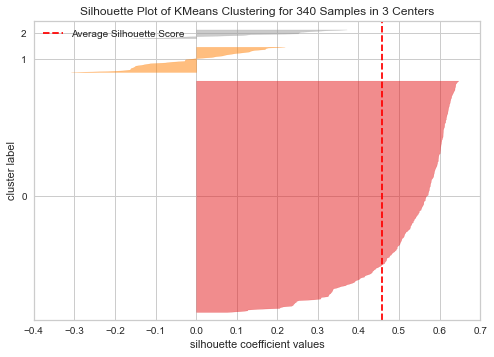

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [35]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1, n_init=200))
visualizer.fit(df_k_means)
visualizer.show()

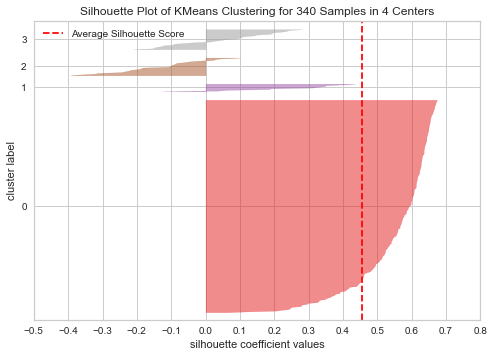

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [36]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1, n_init=200))
visualizer.fit(df_k_means)
visualizer.show()

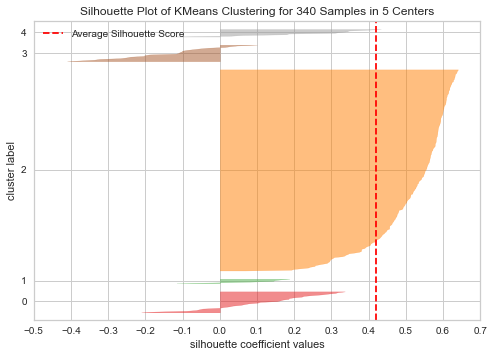

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [37]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1, n_init=200))
visualizer.fit(df_k_means)
visualizer.show()

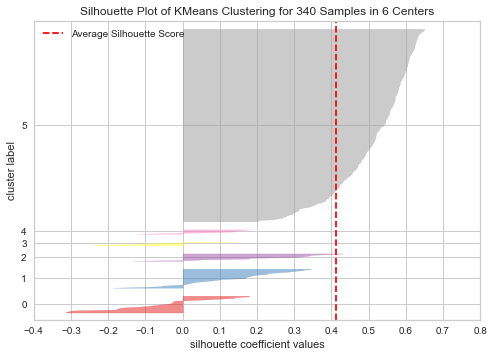

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [38]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1, n_init=200))
visualizer.fit(df_k_means)
visualizer.show()

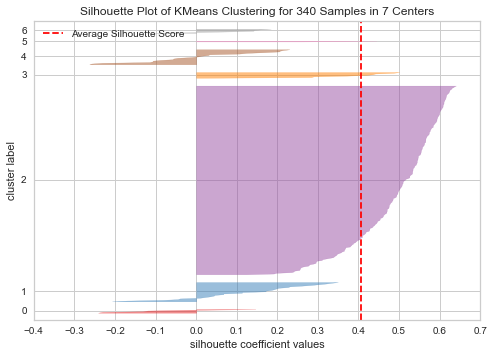

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [39]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1, n_init=200))
visualizer.fit(df_k_means)
visualizer.show()

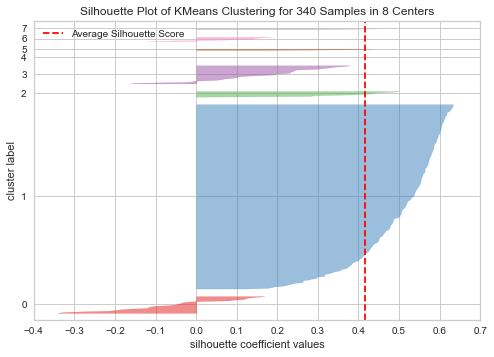

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [40]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(8, random_state=1, n_init=200))
visualizer.fit(df_k_means)
visualizer.show()

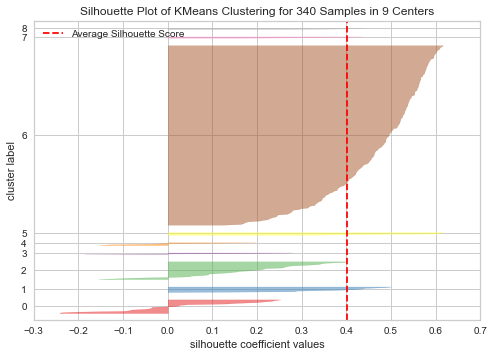

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 9 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [41]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(9, random_state=1, n_init=200))
visualizer.fit(df_k_means)
visualizer.show()

**Let's take 6 as the appropriate no. of clusters as the silhouette score is high enough and there is knick at 6 in the elbow curve.**

In [42]:
%%time
# let's take 6 as number of clusters
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(df_k_means)

Wall time: 61.7 ms


KMeans(n_clusters=6, random_state=0)

<IPython.core.display.Javascript object>

In [43]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes

df1["K_means_segments"] = kmeans.labels_
df_k_means["K_means_segments"] = kmeans.labels_

<IPython.core.display.Javascript object>

## Cluster Profiling

In [44]:
cluster_profile = df1.groupby("K_means_segments").mean()

cluster_profile["count_in_each_segments"] = (
    df1.groupby("K_means_segments")["ROE"].count().values
)

# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio,count_in_each_segments
K_means_segments,,,,,,,,,,,,
0,72.633251,5.118334,1.383473,34.800000,52.905455,-14092741.818182,1473201570.909091,3.631473,430196050.060400,23.859540,-3.389063,275
1,44.470001,11.397804,2.405408,917.000000,80.000000,698000000.000000,-23528000000.000000,-61.200000,384444444.400000,93.089287,4.970809,1
2,48.103077,6.053507,1.163964,27.538462,77.230769,773230769.230769,14114923076.923077,3.958462,3918734987.169230,16.098039,-4.253404,13
3,34.516154,-17.260440,2.938570,76.076923,48.769231,-261407346.153846,-3098292307.692307,-7.388077,481614743.486154,75.734798,1.646607,26
4,327.006671,21.917380,2.029752,4.000000,106.000000,698240666.666667,287547000.000000,0.750000,366763235.300000,400.989188,-5.322376,3
5,225.945603,12.362269,1.743078,28.545455,299.500000,759552909.090909,1031240545.454545,6.590455,587974943.437273,47.839183,16.875739,22


<IPython.core.display.Javascript object>

In [45]:
## to print the companies in each cluster
for cl in df1["K_means_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["K_means_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group', 'AbbVie', 'Abbott Laboratories', 'Adobe Systems Inc', 'Archer-Daniels-Midland Co', ..., 'Xylem Inc.', 'Yum! Brands Inc', 'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis']
Length: 275
Categories (275, object): ['American Airlines Group', 'AbbVie', 'Abbott Laboratories', 'Adobe Systems Inc', ..., 'Yum! Brands Inc', 'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis']

In cluster 5, the following companies are present:
['Analog Devices, Inc.', 'Alliance Data Systems', 'Amgen Inc', 'BIOGEN IDEC Inc.', 'Celgene Corp.', ..., 'TripAdvisor', 'Vertex Pharmaceuticals Inc', 'Waters Corporation', 'Wynn Resorts Ltd', 'Yahoo Inc.']
Length: 22
Categories (22, object): ['Analog Devices, Inc.', 'Alliance Data Systems', 'Amgen Inc', 'BIOGEN IDEC Inc.', ..., 'Vertex Pharmaceuticals Inc', 'Waters Corporation', 'Wynn Resorts Ltd', 'Yahoo Inc.']

In cluster 4, the following companies are present:
['Alexion Pharmaceuticals', 'A

<IPython.core.display.Javascript object>

In [46]:
df1.groupby(["K_means_segments", "GICS_Sector"])["Security"].count()

K_means_segments  GICS_Sector                
0                 Consumer Discretionary         33
                  Consumer Staples               17
                  Energy                          6
                  Financials                     45
                  Health Care                    28
                  Industrials                    52
                  Information Technology         24
                  Materials                      18
                  Real Estate                    26
                  Telecommunications Services     2
                  Utilities                      24
1                 Consumer Discretionary          0
                  Consumer Staples                0
                  Energy                          1
                  Financials                      0
                  Health Care                     0
                  Industrials                     0
                  Information Technology          0
                  

<IPython.core.display.Javascript object>

In [47]:
pd.crosstab(df1.K_means_segments, df1.GICS_Sector).style.highlight_max(
    color="lightgreen", axis=0
)

GICS_Sector,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Telecommunications Services,Utilities
K_means_segments,,,,,,,,,,,
0,33,17,6,45,28,52,24,18,26,2,24
1,0,0,1,0,0,0,0,0,0,0,0
2,1,1,1,4,3,0,1,0,0,2,0
3,0,0,21,0,0,1,2,2,0,0,0
4,1,0,0,0,1,0,1,0,0,0,0
5,5,1,1,0,8,0,5,0,1,1,0


<IPython.core.display.Javascript object>

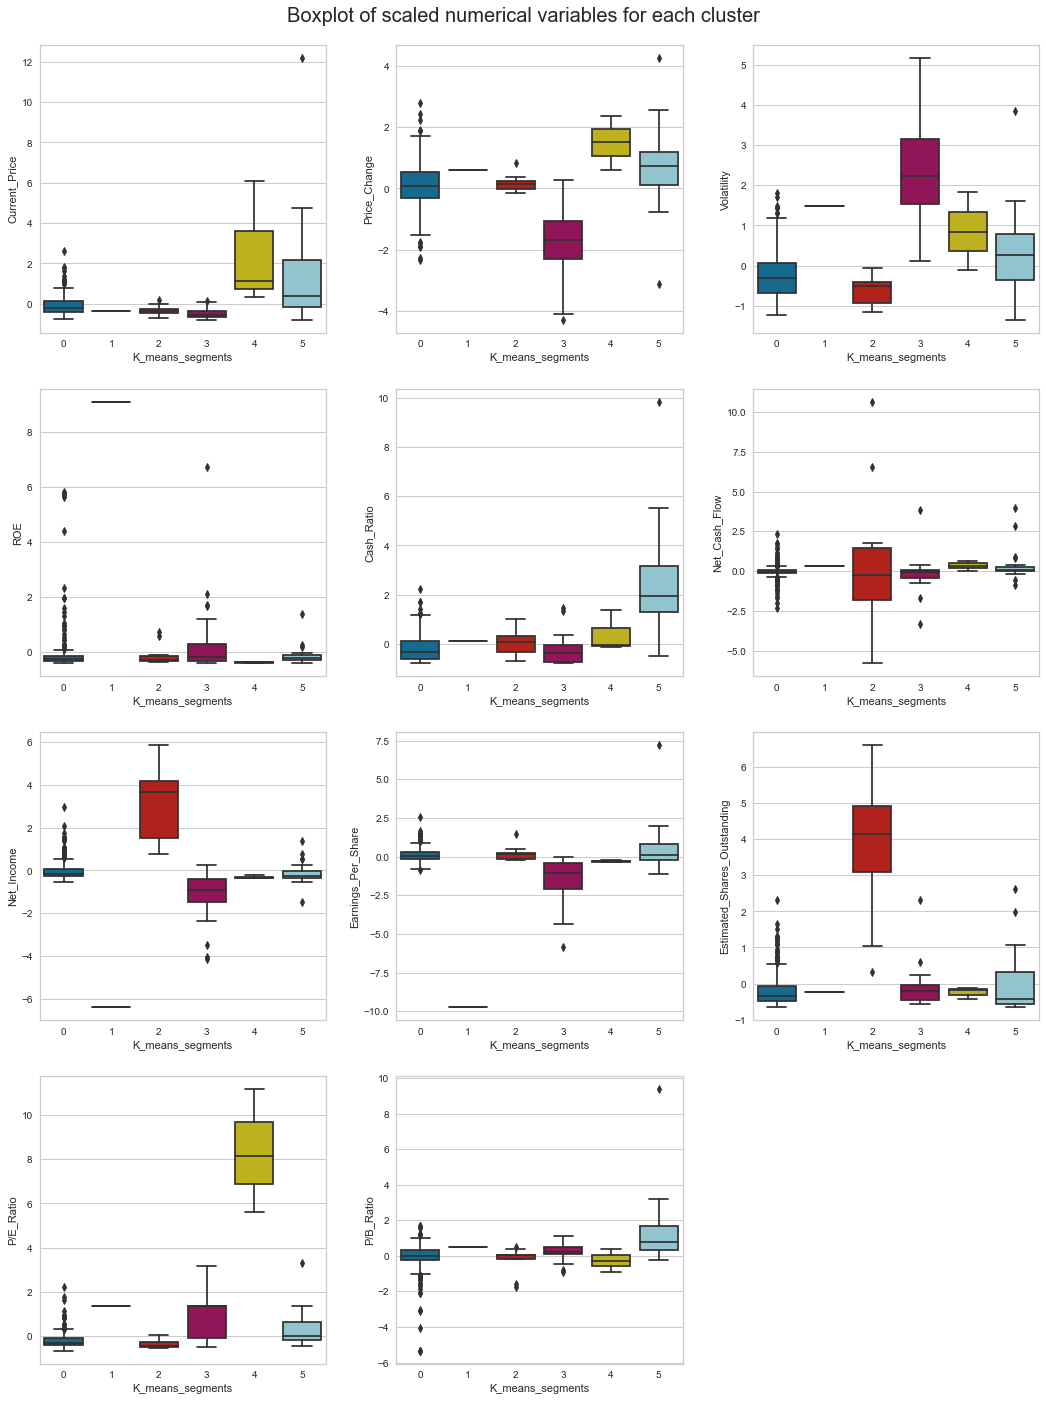

<IPython.core.display.Javascript object>

In [48]:
fig = plt.figure(figsize=(15, 20))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(11):
    plt.subplot(4, 3, ii + 1)
    sns.boxplot(
        y=df_k_means[num_col[counter]], x=df_k_means["K_means_segments"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

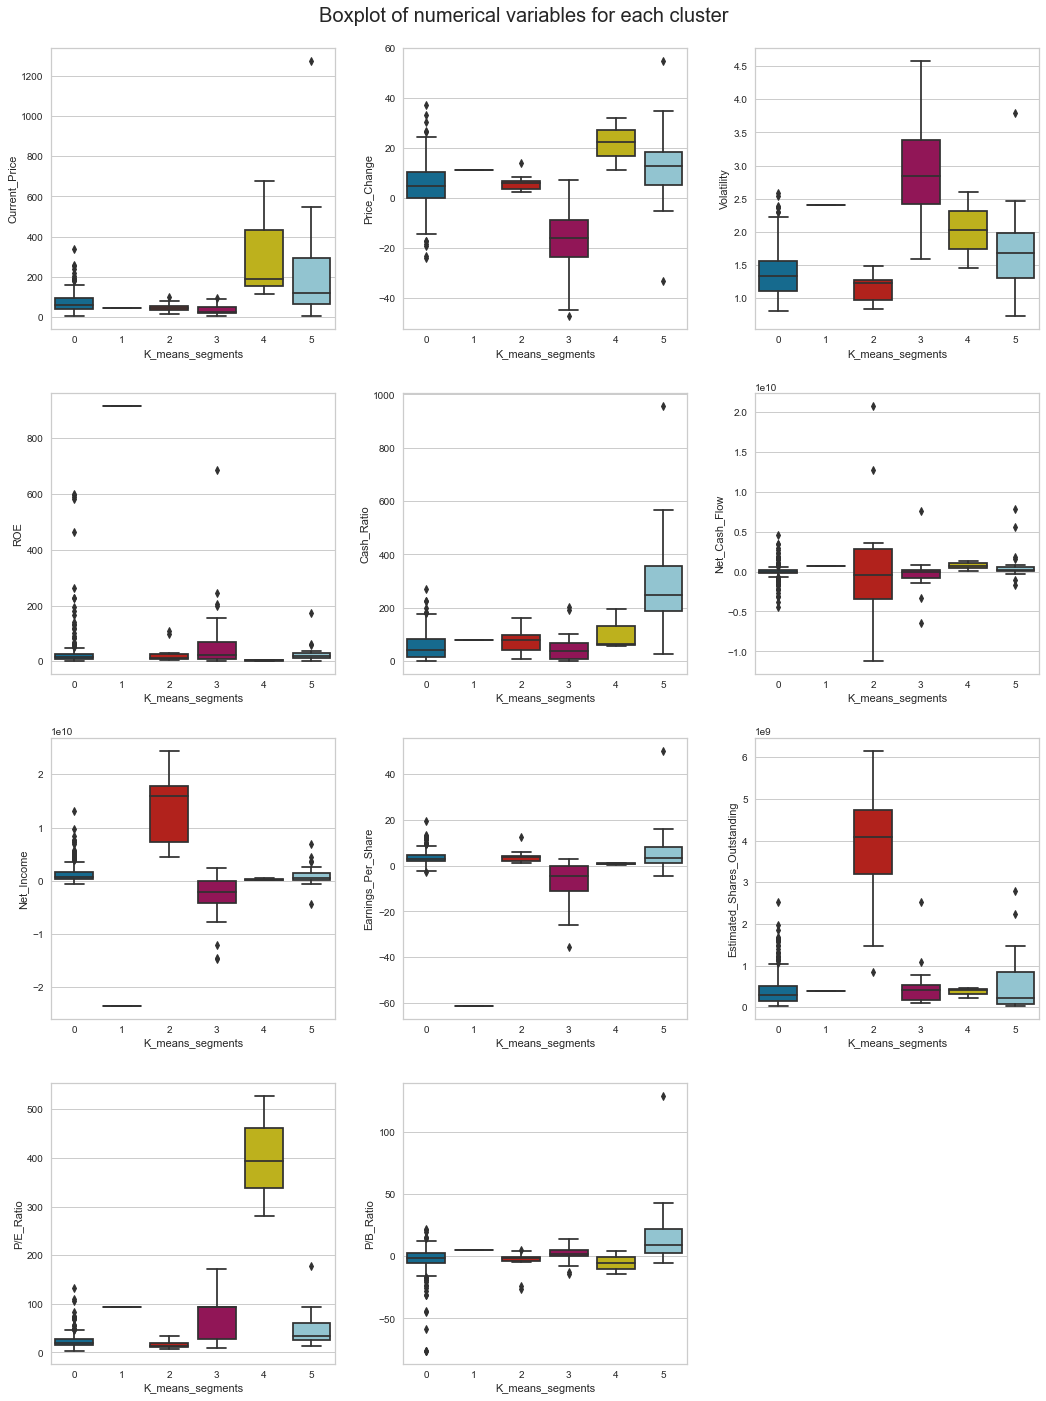

<IPython.core.display.Javascript object>

In [49]:
fig = plt.figure(figsize=(15, 20))
fig.suptitle("Boxplot of numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(11):
    plt.subplot(4, 3, ii + 1)
    sns.boxplot(
        y=df1[num_col[counter]], x=df1["K_means_segments"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

In [50]:
df_k_means["K_means_segments"].value_counts()

0    275
3     26
5     22
2     13
4      3
1      1
Name: K_means_segments, dtype: int64

<IPython.core.display.Javascript object>

In [51]:
# scaling the dataset
scaler3 = MinMaxScaler()
subset3 = df[num_col].copy()
subset_scaled3 = scaler3.fit_transform(subset3)

# creating a dataframe of the scaled columns
subset_scaled_df3 = pd.DataFrame(subset_scaled3, columns=subset3.columns)
subset_scaled_df3["K_means_segments"] = df1["K_means_segments"]

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='K_means_segments'>

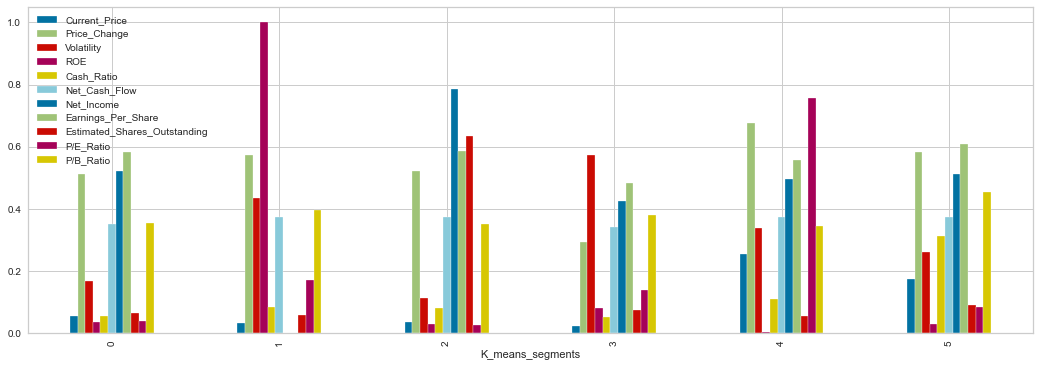

<IPython.core.display.Javascript object>

In [52]:
subset_scaled_df3.groupby("K_means_segments").mean().plot.bar(figsize=(18, 6))

* Due to the randomness of KMeans, the numbering of clusters might be different to what is described here ...

- **Cluster 0**:
    - Most of the data are classified in this cluster.
    - Based on GICS sector classification, Industrials is the most dominant sector in class 0.
    - Price change, net income and and earning per share are the highest ones in this class.
    - The ROE is the lowest in this class.

- **Cluster 1**:
    - Based on GICS sector classification, Health Care is the most dominant sector in class 1.
    - The current_price and price change is positive and the highest one for this class amonge all the other clusters.
    - Earning per share, price change and net income are the most dominant ones in this class.
    - The ROE is the lowest in this class.
    
- **Cluster 2**:
    - The most dominant one is volatility in this class.
    - The current price is the lowest feature in this class.
    
- **Cluster 3**:
    - The net income and Estimated share outstanding are the highest ones in this class.
    - The P/E ratio is the lowest one in this class.
    - The P/B ratio and ROE also is low in this class.
    
- **Cluster 4**: 
    - The highest feature is net cash flow followed by net income in this class.
    - The P/B ratio and ROE also are the lowest in this class.
    
- **Cluster 5**: 
    - The highest feature is earning per share in this class.
    - The P/E ratio is the lowest one in this class.

## Hierarchical Clustering

In [53]:
df_h = subset_scaled_df.copy()  # make a copy from the scaled data

<IPython.core.display.Javascript object>

In [54]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(df_h, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(df_h))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9259195530524591.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850003.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159737.
Cophenetic correl

<IPython.core.display.Javascript object>

In [55]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage.


<IPython.core.display.Javascript object>

**Let's explore different linkage methods with Euclidean distance only.**

In [56]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(df_h, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(df_h))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.


<IPython.core.display.Javascript object>

In [57]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


<IPython.core.display.Javascript object>

**Let's see the dendrograms for the different linkage methods.**

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [105.0, 105.0, 115.0, 115.0],
  [125.0, 125.0, 135.0, 135.0],
  [110.0, 110.0, 130.0, 130.0],
  [95.0, 95.0, 120.0, 120.0],
  [85.0, 85.0, 107.5, 107.5],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [175.0, 175.0, 192.5, 192.5],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [183.75, 183.75, 222.5, 222.5],
  [245.0, 245.0, 255.0, 255.0],
  [275.0, 275.0, 285.0, 285.0],
  [295.0, 295.0, 305.0, 305.0],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [355.0, 355.0, 365.0, 365.0],
  [345.0, 345.0, 360.0, 360.0],
  [385.0, 385.0, 395.0, 395.0],
  [375.0, 375.0, 390.0, 390.0],
  [415.0, 415.0, 425.0, 425.0],
  [405.0, 405.0, 420.0, 420.0],
  [382.5, 382.5, 412.5, 412.5],
  [352.5, 352.5, 397.5, 397.5],
  [455.0, 455.0, 465.0, 465.0],
  [445.0, 445.0, 460.0, 460.0],
  [435.0, 435.

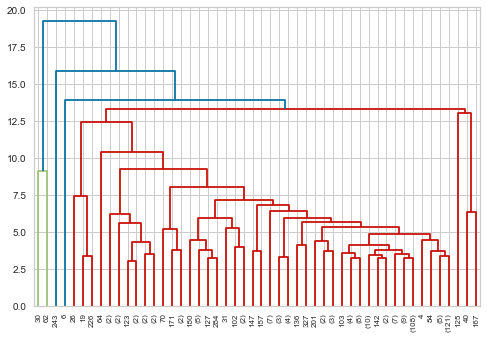

<IPython.core.display.Javascript object>

In [58]:
dendrogram(Z, p=50, truncate_mode="lastp")

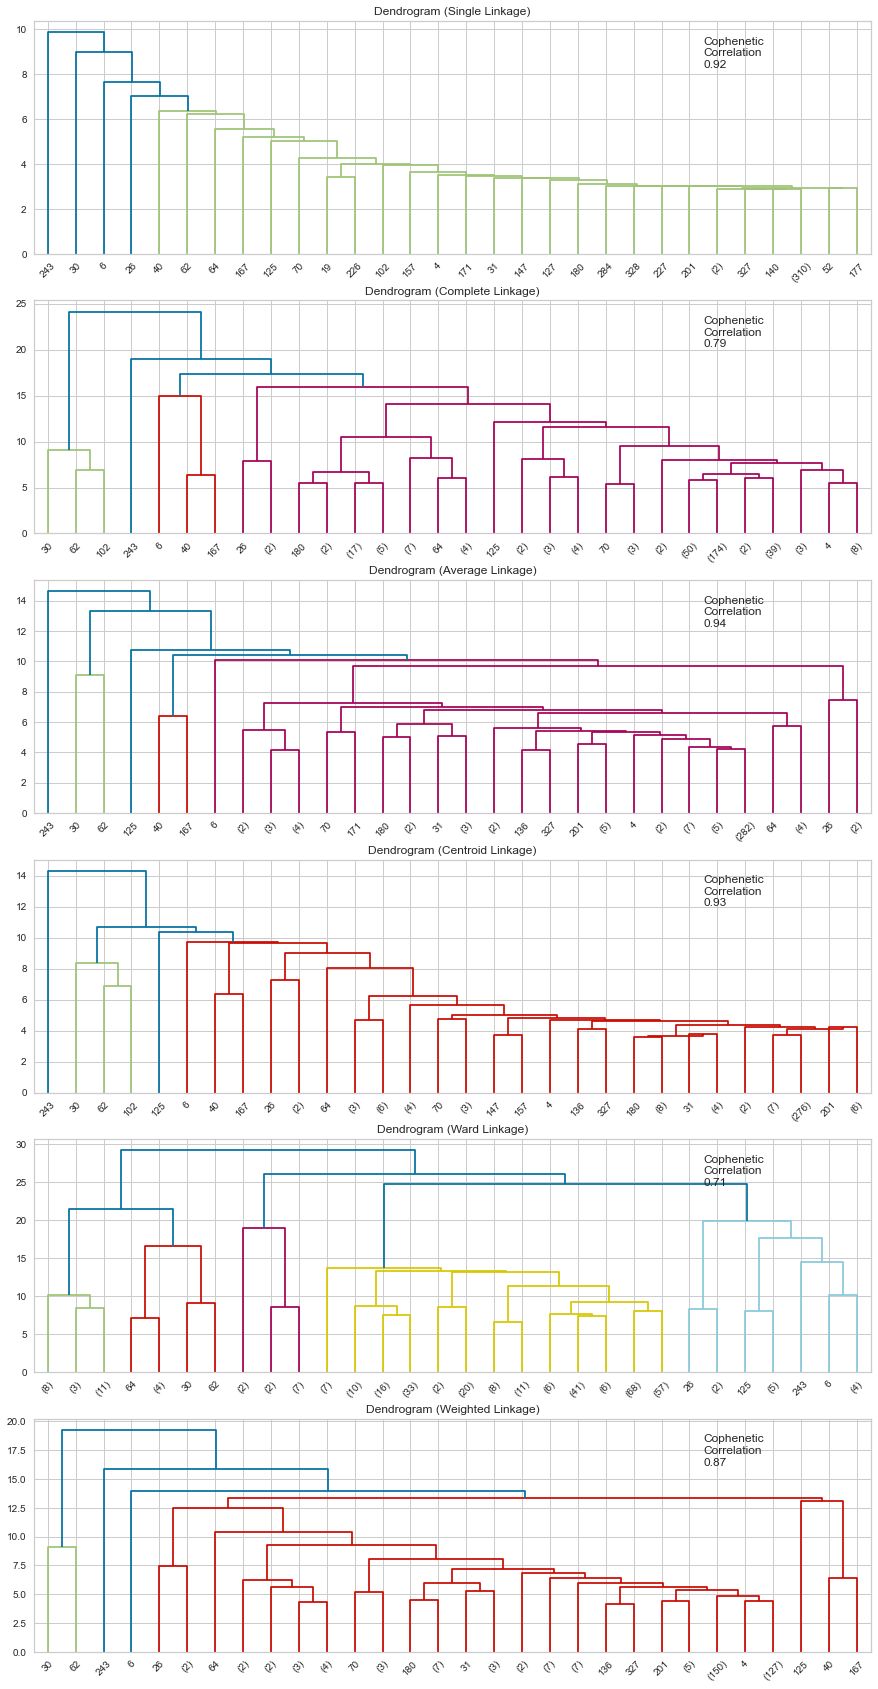

<IPython.core.display.Javascript object>

In [59]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(df_h, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i], truncate_mode="lastp")
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(df_h))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [60]:
# let's create a dataframe to compare cophenetic correlations for each linkage method
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc

,Linkage,Cophenetic Coefficient
0,single,0.923227
1,complete,0.787328
2,average,0.942254
3,centroid,0.931401
4,ward,0.710118
5,weighted,0.869378


<IPython.core.display.Javascript object>

In [61]:
%%time
HCmodel1 = AgglomerativeClustering(n_clusters=7, affinity="euclidean", linkage="average")
HCmodel1.fit(df_h)

Wall time: 15.6 ms


AgglomerativeClustering(linkage='average', n_clusters=7)

<IPython.core.display.Javascript object>

In [62]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original dataframes
df2["HC_Clusters"] = HCmodel1.labels_

<IPython.core.display.Javascript object>

In [63]:
df2["HC_Clusters"].value_counts()

6    330
2      3
0      2
1      2
3      1
4      1
5      1
Name: HC_Clusters, dtype: int64

<IPython.core.display.Javascript object>

* Based on the above analysis and cophenetic Coefficient, the affinity is selected as euclidean distance and linkage method as average. 
* But as it is clear, this method could not cluster the data too much (330 out of 340 records are in one cluster) and most of the data are gathered in one cluster.

**Based on the above result, the affinity is selected as euclidean distance and linkage methid as ward**

In [64]:
%%time
HCmodel = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
HCmodel.fit(df_h)

Wall time: 15.6 ms


AgglomerativeClustering(n_clusters=5)

<IPython.core.display.Javascript object>

In [65]:
# creating a copy of the original data
del df2
df2 = df.copy()


# adding hierarchical cluster labels to the original and scaled dataframes
df_h["HC_Clusters"] = HCmodel.labels_
df2["HC_Clusters"] = HCmodel.labels_

<IPython.core.display.Javascript object>

## Cluster Profiling

In [66]:
cluster_profile = df2.groupby("HC_Clusters").mean()

cluster_profile["count_in_each_segments"] = (
    df2.groupby("HC_Clusters")["ROE"].count().values
)


# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)


,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio,count_in_each_segments
HC_Clusters,,,,,,,,,,,,
0,326.198218,10.563242,1.642560,14.400000,309.466667,288850666.666667,864498533.333333,7.785333,544900261.301333,113.095334,19.142151,15
1,84.355716,3.854981,1.827670,633.571429,33.571429,-568400000.000000,-4968157142.857142,-10.841429,398169036.442857,42.284541,-11.589502,7
2,42.848182,6.270446,1.123547,22.727273,71.454545,558636363.636364,14631272727.272728,3.410000,4242572567.290909,15.242169,-4.924615,11
3,72.760400,5.213307,1.427078,25.603509,60.392982,79951512.280702,1538594322.807018,3.655351,446472132.228456,24.722670,-2.647194,285
4,36.440455,-16.073408,2.832884,57.500000,42.409091,-472834090.909091,-3161045227.272727,-8.005000,514367806.201818,85.555682,0.836839,22


<IPython.core.display.Javascript object>

In [67]:
## to print the companies in each cluster
for cl in df2["HC_Clusters"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_Clusters"] == cl]["Security"].unique())
    print()

In cluster 3, the following companies are present:
['American Airlines Group', 'AbbVie', 'Abbott Laboratories', 'Adobe Systems Inc', 'Analog Devices, Inc.', ..., 'Xylem Inc.', 'Yum! Brands Inc', 'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis']
Length: 285
Categories (285, object): ['American Airlines Group', 'AbbVie', 'Abbott Laboratories', 'Adobe Systems Inc', ..., 'Yum! Brands Inc', 'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis']

In cluster 0, the following companies are present:
['Alliance Data Systems', 'Alexion Pharmaceuticals', 'Amgen Inc', 'Amazon.com Inc', 'Chipotle Mexican Grill', ..., 'Netflix Inc.', 'Priceline.com Inc', 'Regeneron', 'Waters Corporation', 'Yahoo Inc.']
Length: 15
Categories (15, object): ['Alliance Data Systems', 'Alexion Pharmaceuticals', 'Amgen Inc', 'Amazon.com Inc', ..., 'Priceline.com Inc', 'Regeneron', 'Waters Corporation', 'Yahoo Inc.']

In cluster 1, the following companies are present:
['Allegion', 'Apache Corporation', 'Chesapeake Energy',

<IPython.core.display.Javascript object>

In [68]:
df2.groupby(["HC_Clusters", "GICS_Sector"])["Security"].count()

HC_Clusters  GICS_Sector                
0            Consumer Discretionary          3
             Consumer Staples                1
             Energy                          0
             Financials                      0
             Health Care                     5
             Industrials                     0
             Information Technology          4
             Materials                       0
             Real Estate                     1
             Telecommunications Services     1
             Utilities                       0
1            Consumer Discretionary          1
             Consumer Staples                2
             Energy                          2
             Financials                      1
             Health Care                     0
             Industrials                     1
             Information Technology          0
             Materials                       0
             Real Estate                     0
             Teleco

<IPython.core.display.Javascript object>

In [69]:
pd.crosstab(df2.HC_Clusters, df2.GICS_Sector).style.highlight_max(
    color="lightgreen", axis=0
)

GICS_Sector,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Telecommunications Services,Utilities
HC_Clusters,,,,,,,,,,,
0,3,1,0,0,5,0,4,0,1,1,0
1,1,2,2,1,0,1,0,0,0,0,0
2,1,1,1,4,1,0,1,0,0,2,0
3,35,15,7,44,34,52,27,19,26,2,24
4,0,0,20,0,0,0,1,1,0,0,0


<IPython.core.display.Javascript object>

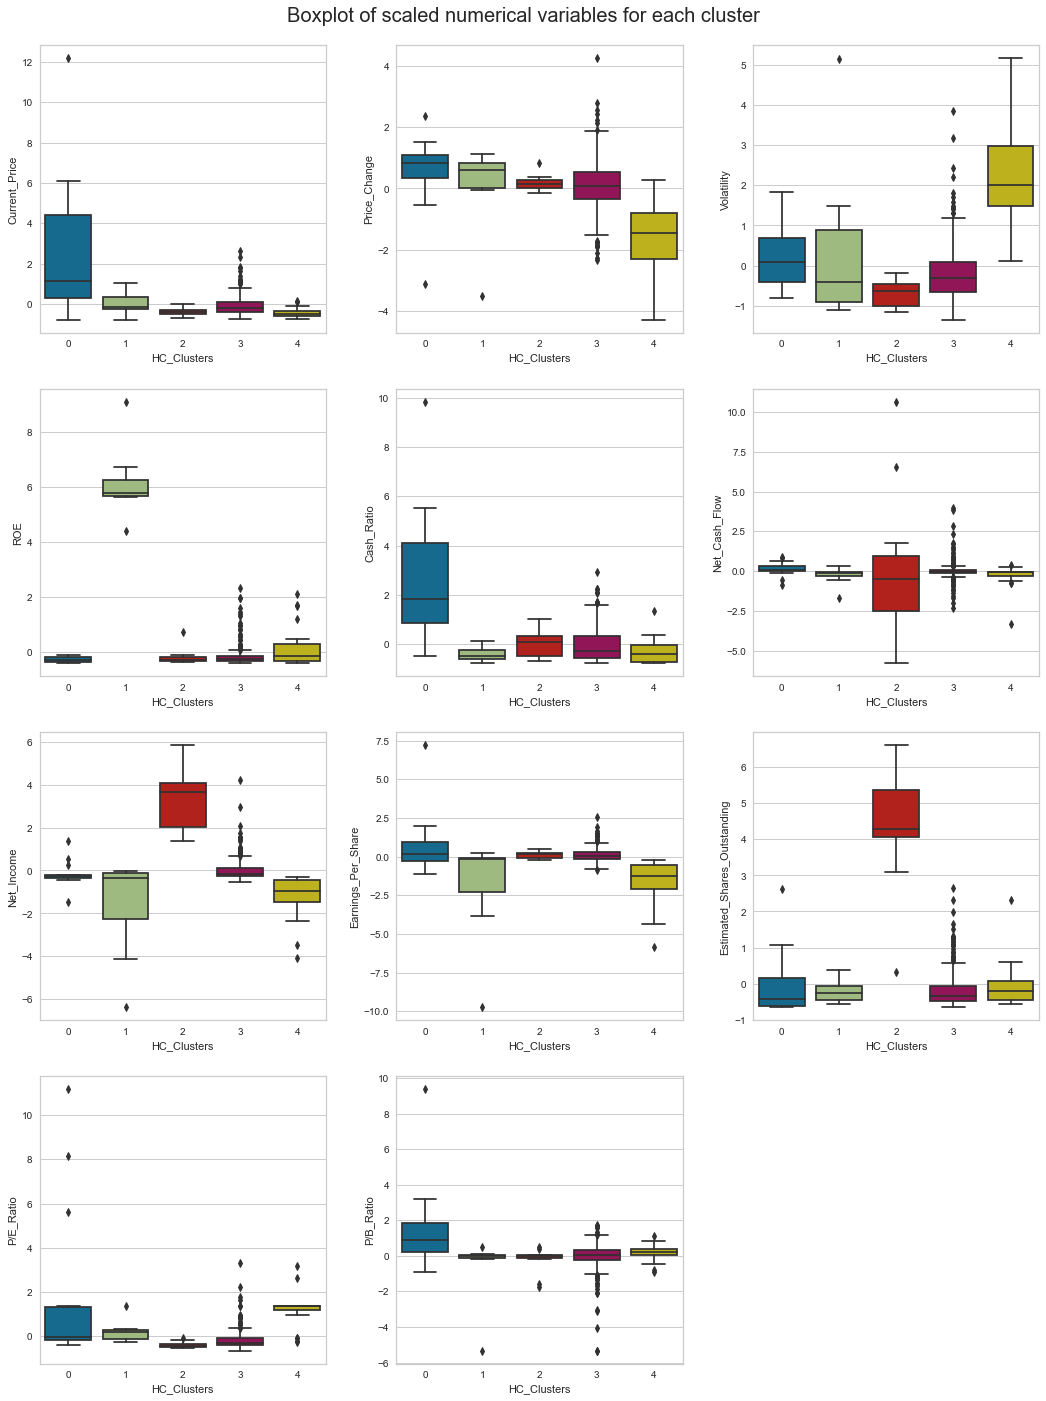

<IPython.core.display.Javascript object>

In [70]:
fig = plt.figure(figsize=(15, 20))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(11):
    plt.subplot(4, 3, ii + 1)
    sns.boxplot(
        y=df_h[num_col[counter]], x=df_h["HC_Clusters"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

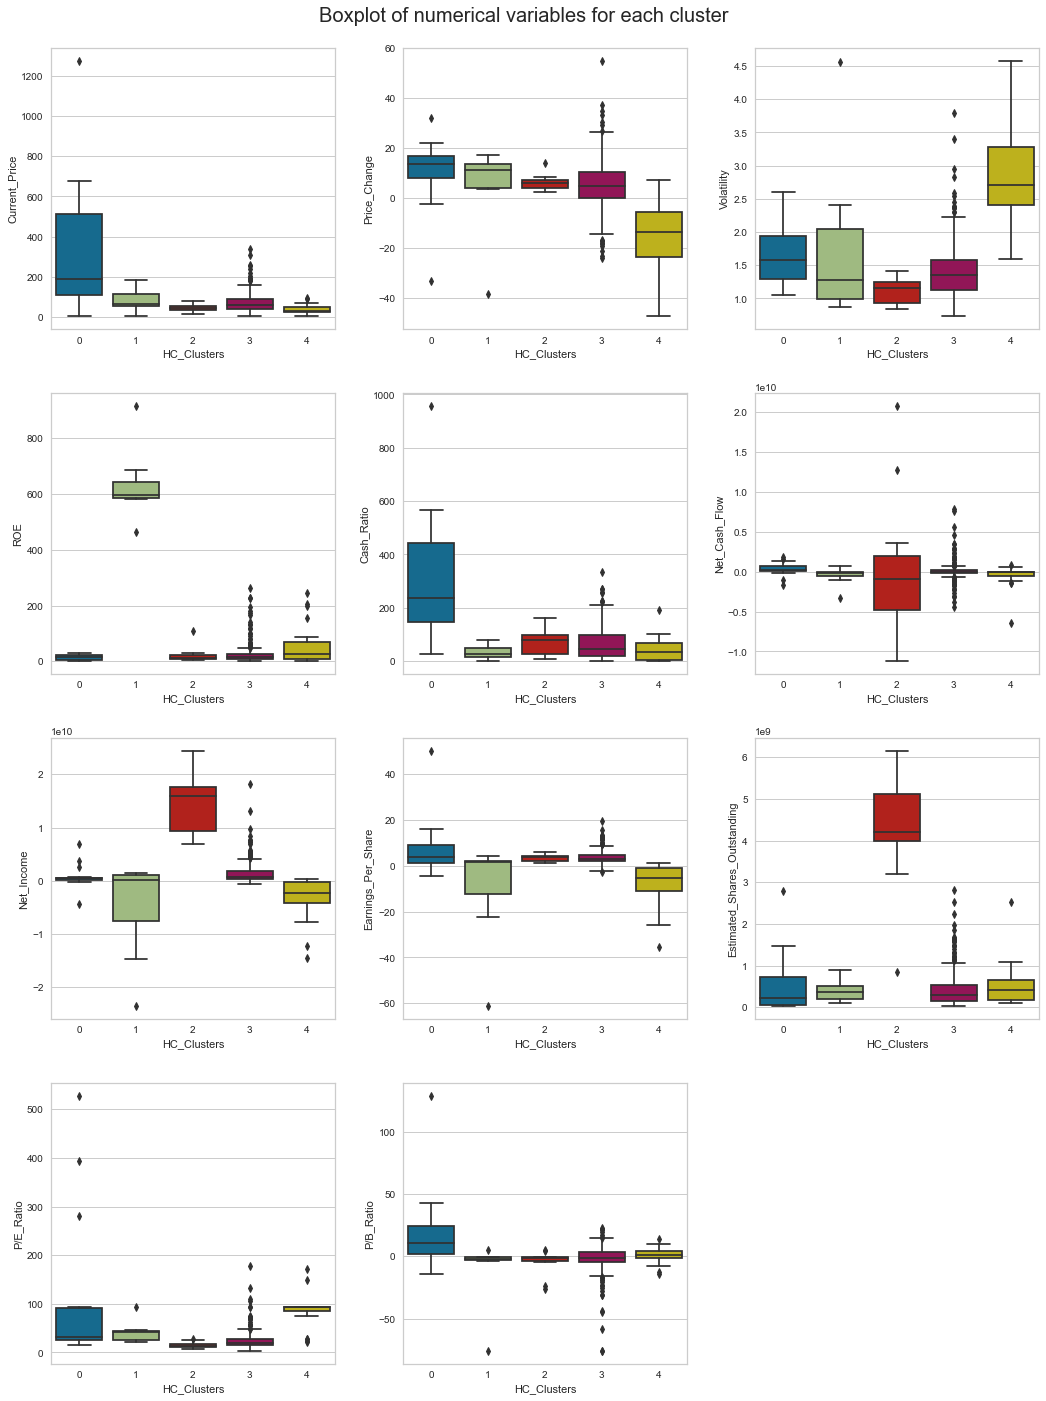

<IPython.core.display.Javascript object>

In [71]:
fig = plt.figure(figsize=(15, 20))
fig.suptitle("Boxplot of numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(11):
    plt.subplot(4, 3, ii + 1)
    sns.boxplot(
        y=df2[num_col[counter]], x=df2["HC_Clusters"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

In [72]:
# scaling the dataset
scaler4 = MinMaxScaler()
subset4 = df[num_col].copy()
subset_scaled4 = scaler4.fit_transform(subset4)

# creating a dataframe of the scaled columns
subset_scaled_df4 = pd.DataFrame(subset_scaled4, columns=subset4.columns)
subset_scaled_df4["HC_Clusters"] = df2["HC_Clusters"]

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='HC_Clusters'>

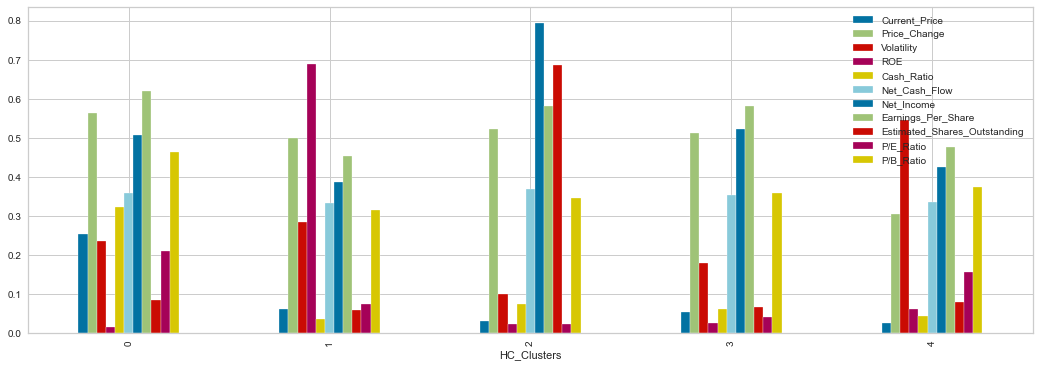

<IPython.core.display.Javascript object>

In [73]:
subset_scaled_df4.groupby("HC_Clusters").mean().plot.bar(figsize=(18, 6))

* The numbering of clusters might be different to what is described here ...

- **Cluster 0**:
    - The cluster contain highest earning per share.
    - Price change, net income and and earning per share are the highest ones in this class.
    - The ROE is the lowest in this class.
    - Based on GICS sector classification, Health Care is the most dominant sector in class 0.

- **Cluster 1**:
    - The ROE is the highest feature in this class.
    - Earning per share and price change are the next most dominant ones in this class.
    - The cash ratio is low in this class.
    
- **Cluster 2**:
    - The most dominant feature is net income in class 2.
    - The ROE, current price and P/E ratio are the lowest features in this class.
    
- **Cluster 3**:
    - Most of the data are classified in this cluster.
    - Based on GICS sector classification, Industrials is the most dominant sector in class 3.
    - The Earning per share is the highest ones in this class.
    - The ROE is the lowest one in this class.
    - The P/E ratio and P/B ratio are low in this class.
    
- **Cluster 4**: 
    - The highest feature is Volatility followed by Earning per share in this class.
    - The P/B ratio is the lowest in this class.
    


## K-means vs Hierarchical Clustering

- **K-Means Clustring**
    - 6 classes are selected as final ones based on Elbow method and silhouette coefficients and values.
    - The main class with majority number of records in that including around 275 numbers in it.
    - 2 clusters including very low number of records. The other remaining 3 classes are more or less in balance.
    - Excecution time for k-means clustering and fit is around 70s.
    
- **Hierarchical Clustering**
    - 4 classes are selected as final ones based on coffenetic score and visual drawing of dendograms.
    - The main class with majority number of records in that including around 280 numbers in it.
    - The other 3 more classes are in balance  as ward method is used.
    - Excecution time for Hierarchical clustering and fit is around 12s.

* Time of excecution is less in Hierarchical clustering compare to k-means which we supposed for k-means to be less. May be it is because of the number of features and number of records (depends on data).

* For the main class which majarity of the data are clustered in that both techniques are more or less the same (one included 275 records and in the other 280 records).


## Actionable Insights and Recommendations

- Based on the analysis and price change during last 13 weekds and GICS classification, it is recommended to invest more money on the classes which included the most number of "Health care" number and the lowest number of "Energy". It is clear in both k-means clustering and Hierarchical clustering method.  

- After maximizing the "Health Care", the classes which mostly included "Consumer Staples" and "Information Technology" categiries are the best class for invest more money in them.

- Based on Hierarchical clustering method, cluster 0, is the best (including more Health care and Information Technology) and followed by cluster 3 which included the other classes too and the less Energy category. The worst class will be cluster 4 based on this method which has lots of Energy category and should be avoided for investment at this time. 

- Base on k-means clustering, cluster 5 is the best (including more Health care and Information Technology) and followed by cluster 0 which included the other classes too and the less Energy category. The worst class will be cluster 3 based on this method which has lots of Energy category and should be avoided for investment at this time.

- The Energy sector is not good for investement at this time and is not recommended.

- The copper (sub-category in GICS classification) was the worst in last 13 weeks and should be avoided from investment at this time. 

- More features are required to cluster more precisely the GICS classification which can help for investing money better on appropreate class.